In [1]:
#Paquetes instalados
!pip3 install outlier_utils
# !pip3 install -U matplotlib

distutils: /usr/local/lib/python3.6/dist-packages
sysconfig: /usr/lib/python3.6/site-packages
distutils: /usr/local/lib/python3.6/dist-packages
sysconfig: /usr/lib/python3.6/site-packages
distutils: /usr/local/include/python3.6/UNKNOWN
sysconfig: /usr/include/python3.6m/UNKNOWN
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
distutils: /home/arteck/.local/include/python3.6m/UNKNOWN
sysconfig: /home/arteck/.local/include/python3.6/UNKNOWN
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
from outliers import smirnov_grubbs as grubbs ## Paquete con el Test de Grubbs
import matplotlib.pyplot as plt ## Paquete para generar gráficas
import numpy as np ## Paquete para 
import matplotlib.pyplot as plt


In [3]:
plt.style.use("Solarize_Light2")

In [54]:
with open("wald_1x.csv") as f:
    X_Y = f.readlines()
x_y = [list(map(str.strip, x.split("\t"))) for x in X_Y]
X = np.array([float(x[0]) for x in x_y])
Y = np.array([float(y[1]) for y in x_y])
X_Y = np.array([[float(x), float(y)] for x,y in x_y])
N_1 = len(X)

In [55]:
from scipy.stats import t
def G(Y):
    return max(np.abs(Y-Y.mean())) / Y.std()
def grubbs_test(G, N, alpha):
    p_1 = (N - 1) / (np.sqrt(N))
    p_2 = sqrt()
    return
def calculate_critical_value(size, alpha):
    """Calculate the critical value with the formula given for example in
    https://en.wikipedia.org/wiki/Grubbs%27_test_for_outliers#Definition
    Args:
        ts (list or np.array): The timeseries to compute the critical value.
        alpha (float): The significance level.
    Returns:0
        float: The critical value for this test.
    """
    t_dist = t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    return critical_value

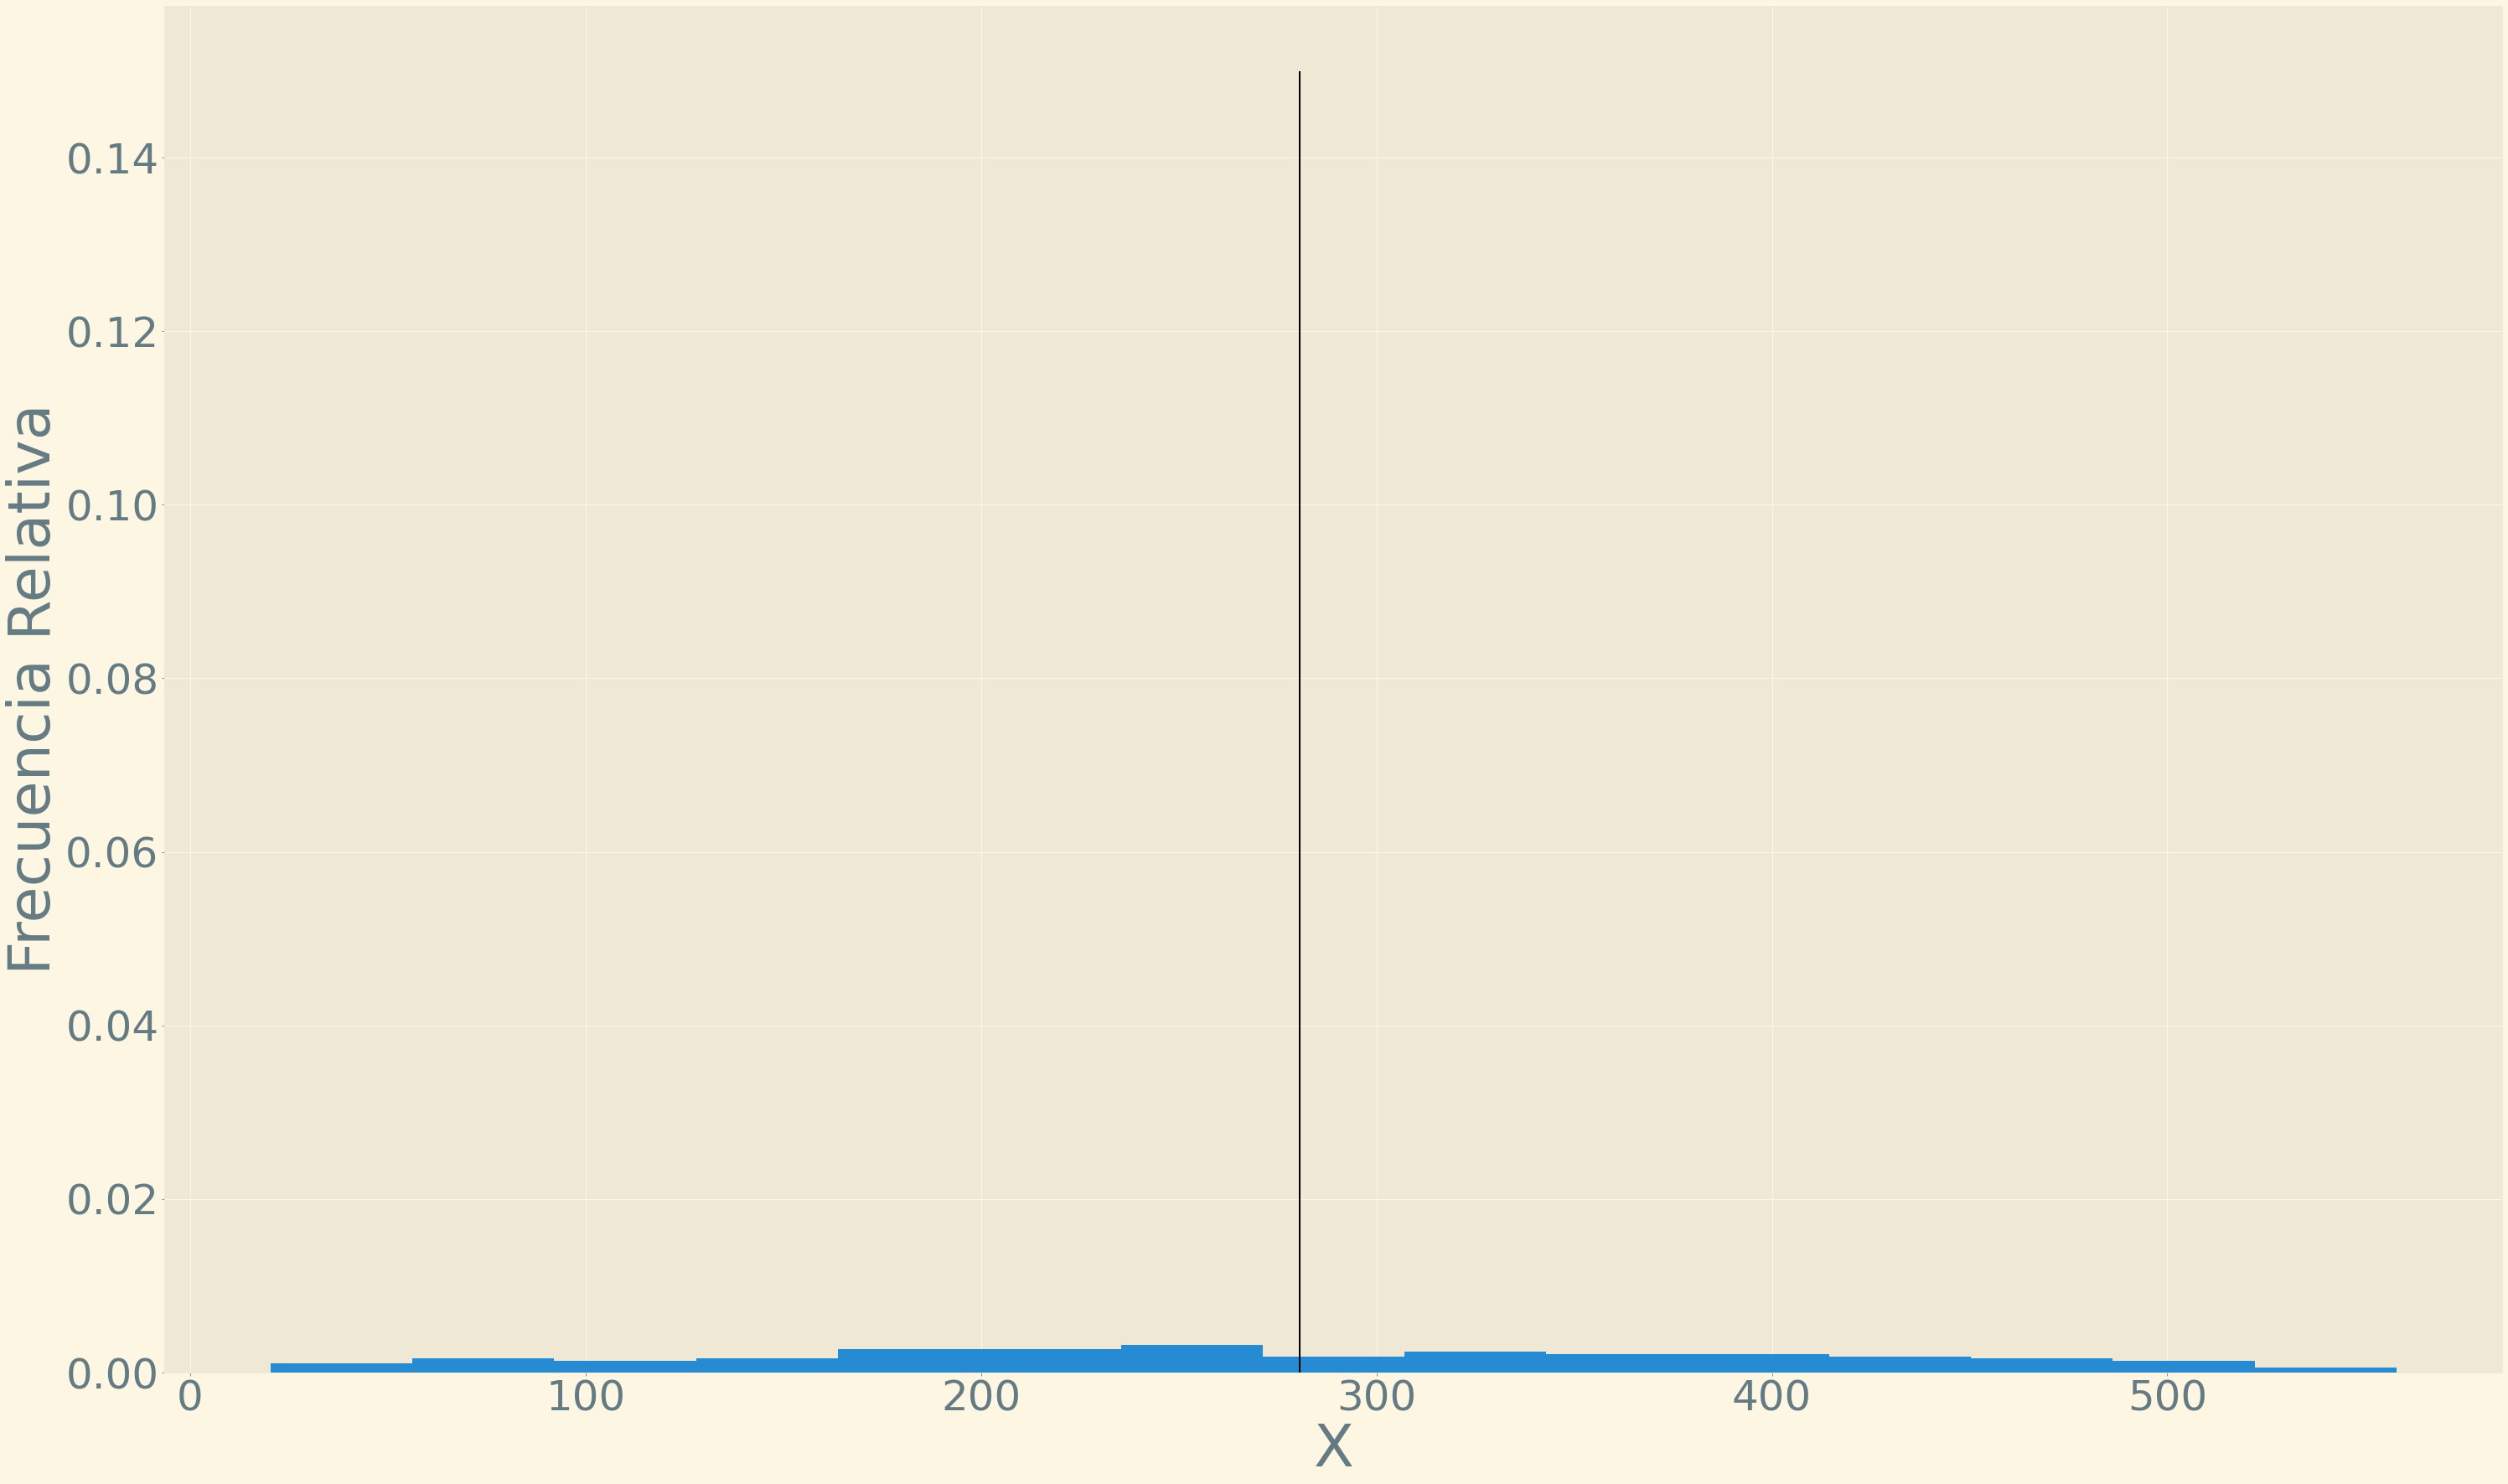

In [56]:
fig = plt.figure(figsize = (50, 30))
plt.hist(X, bins = 15, density = True, label = "Mean");
plt.xlabel("X", fontsize = 70)
plt.xticks(fontsize = 50);
plt.ylabel("Frecuencia Relativa", fontsize = 70)
plt.yticks(fontsize = 50)
plt.vlines(np.mean(X), 0, 0.15, color = "black");

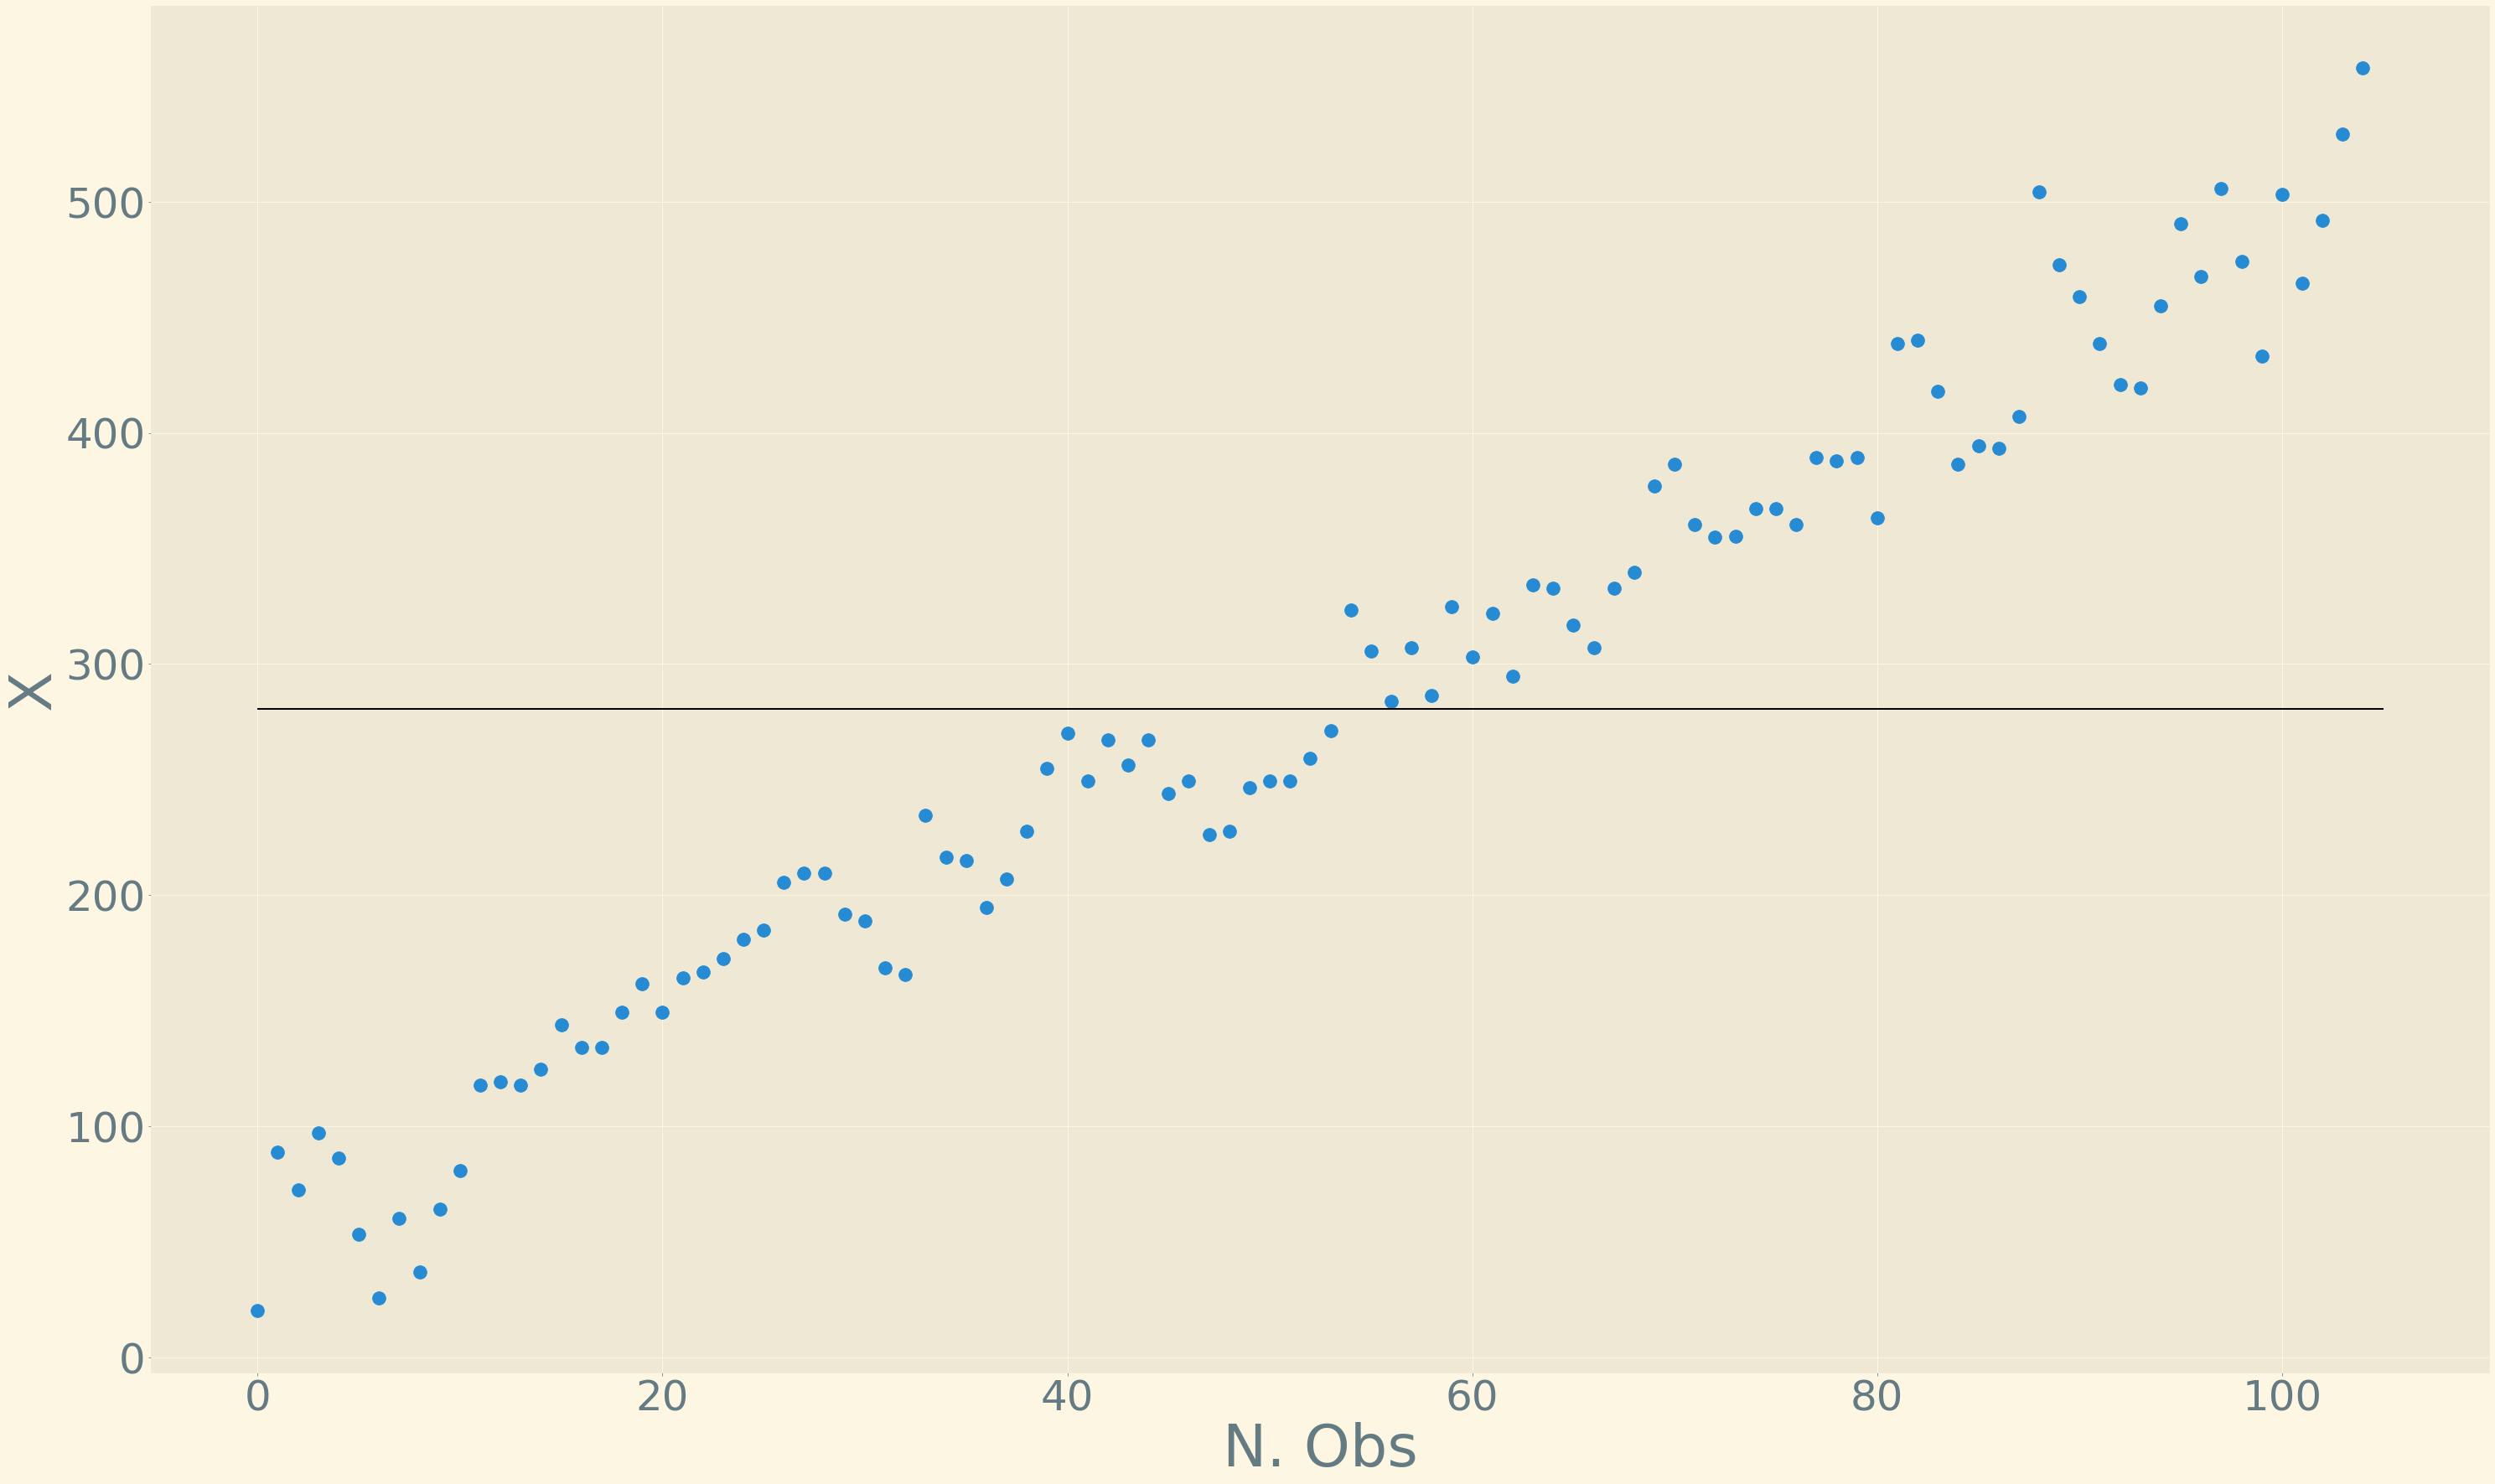

In [57]:
fig = plt.figure(figsize = (50, 30))
plt.scatter(range(N_1),X, s = 244, )
plt.xlabel("N. Obs", fontsize = 70)
plt.xticks(fontsize = 50);
plt.ylabel("X", fontsize = 70)
plt.yticks(fontsize = 50)
plt.hlines(np.mean(X), 0, N_1, color = "black");

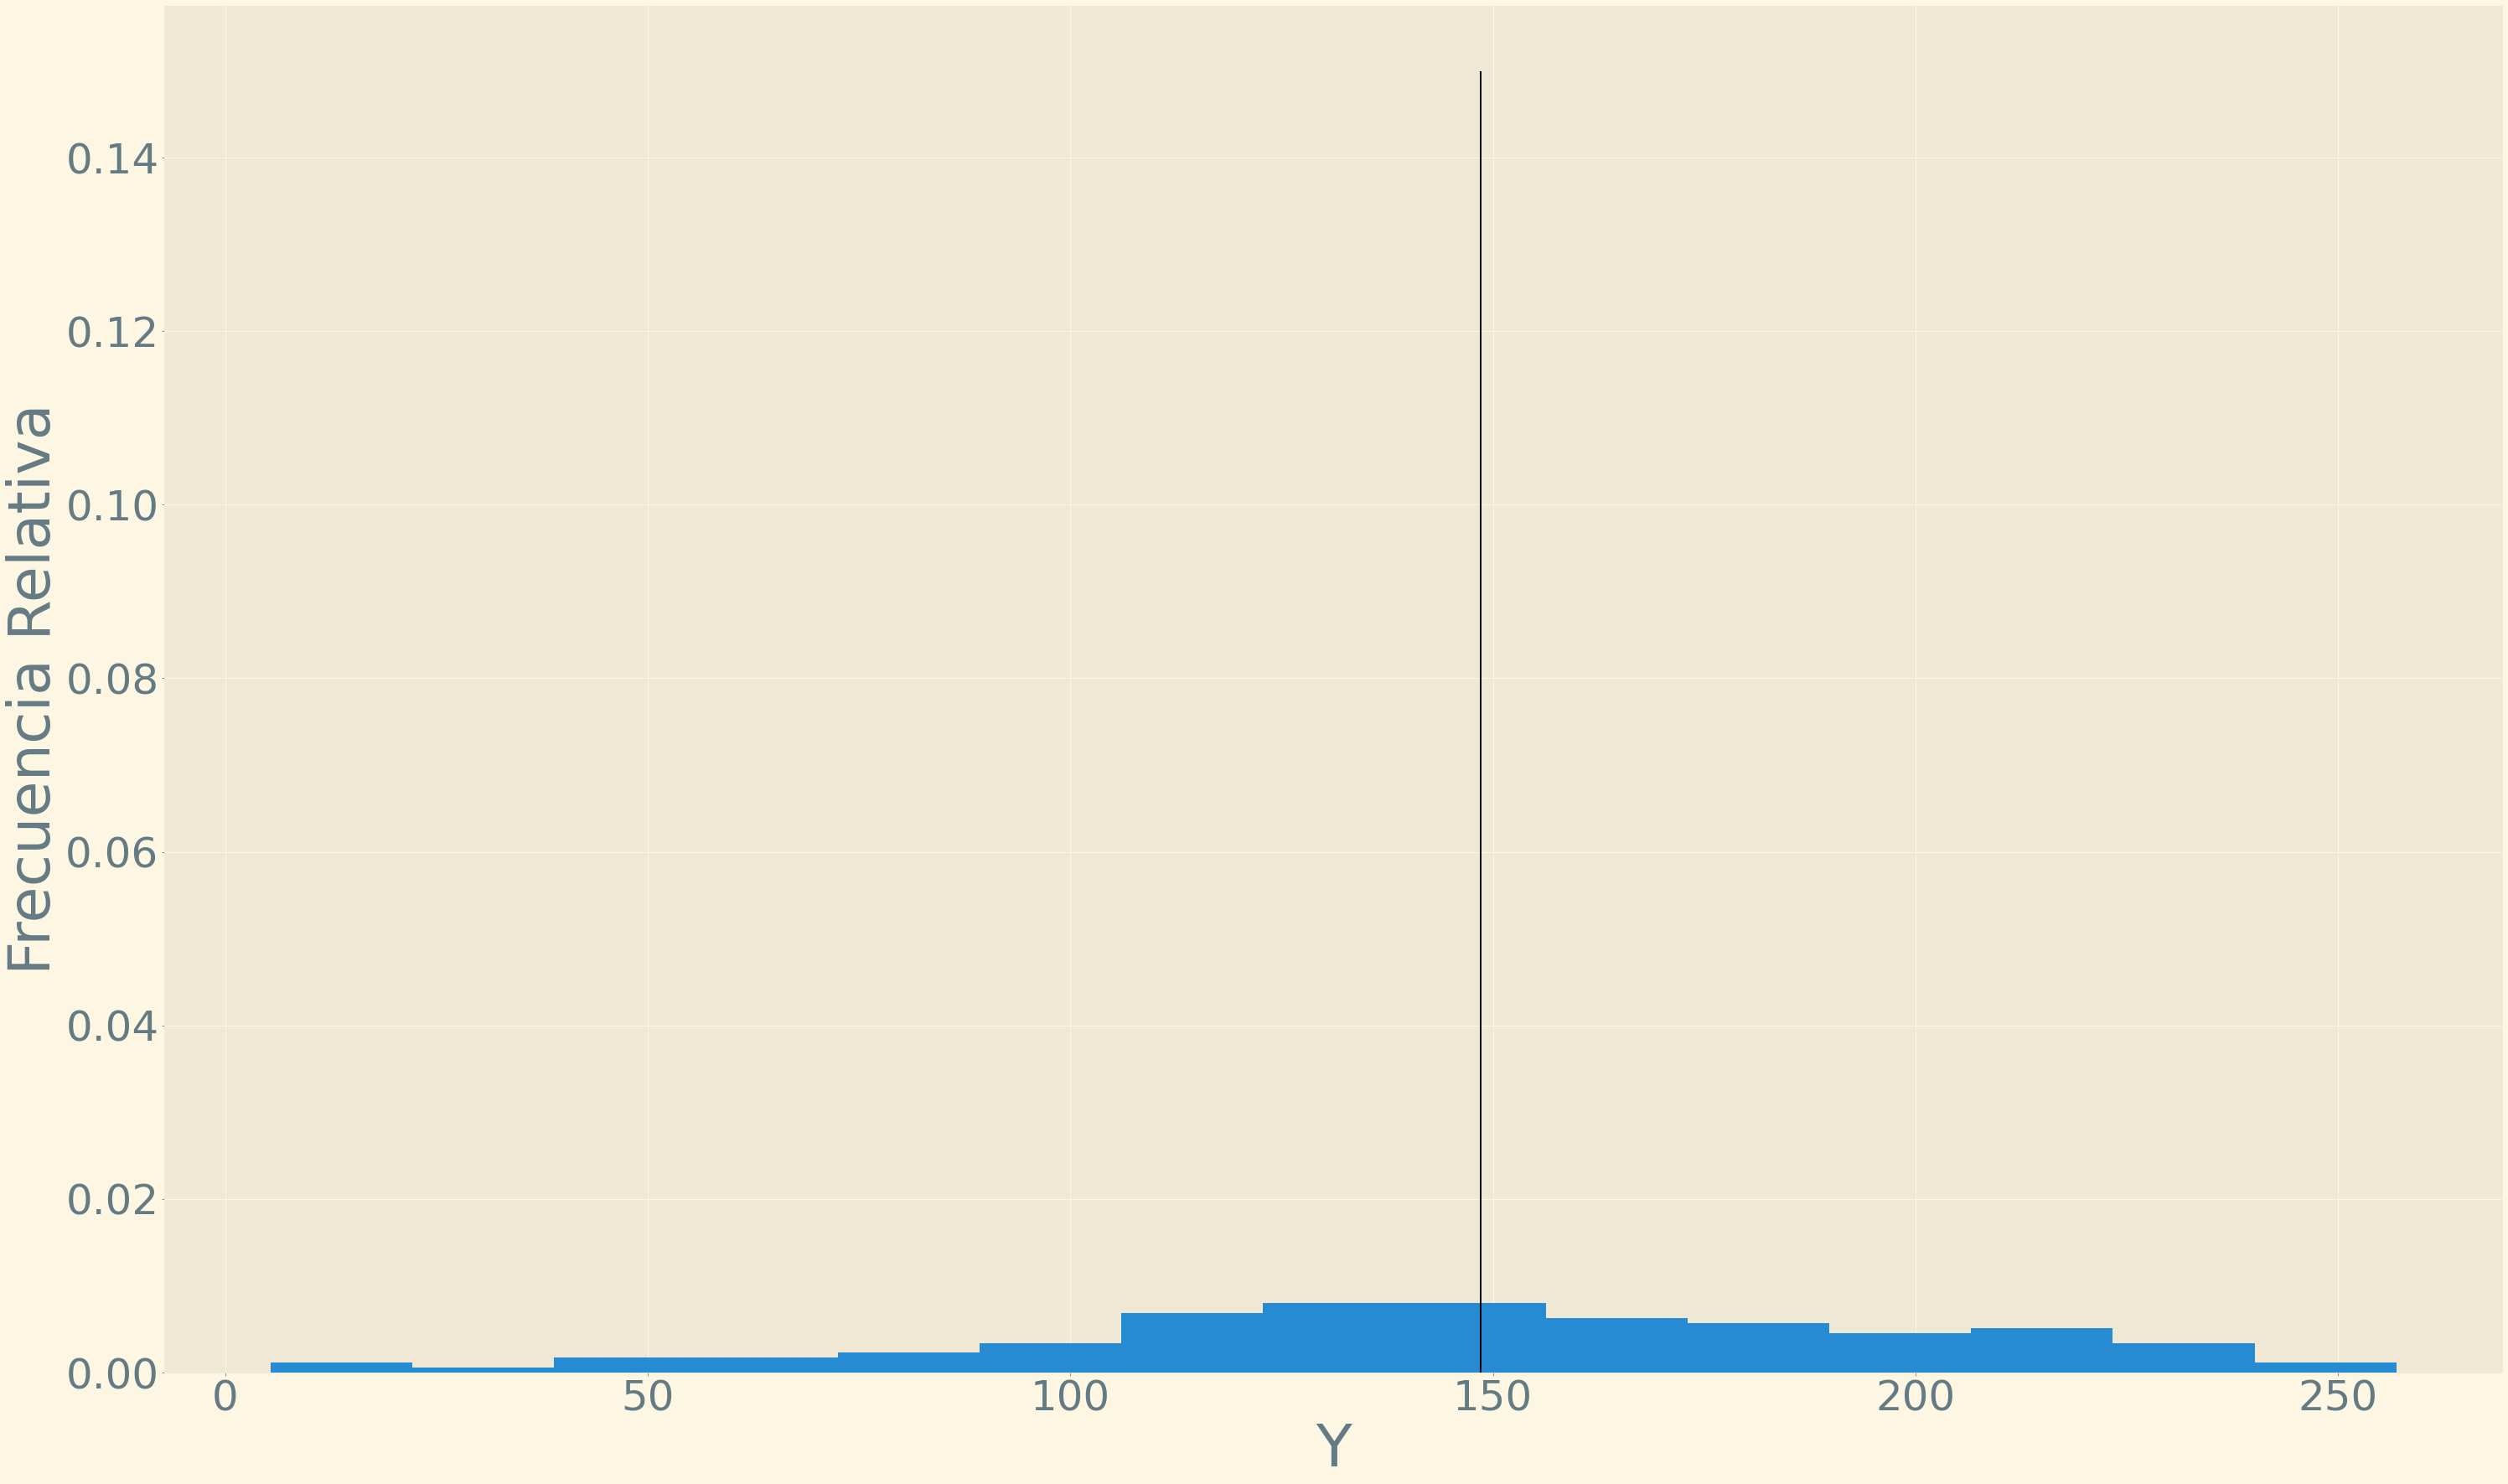

In [58]:
fig = plt.figure(figsize = (50, 30))
plt.hist(Y, bins = 15, density = True, label = "Mean");
plt.xlabel("Y", fontsize = 70)
plt.xticks(fontsize = 50);
plt.ylabel("Frecuencia Relativa", fontsize = 70)
plt.yticks(fontsize = 50)
plt.vlines(np.mean(Y), 0, 0.15, color = "black");

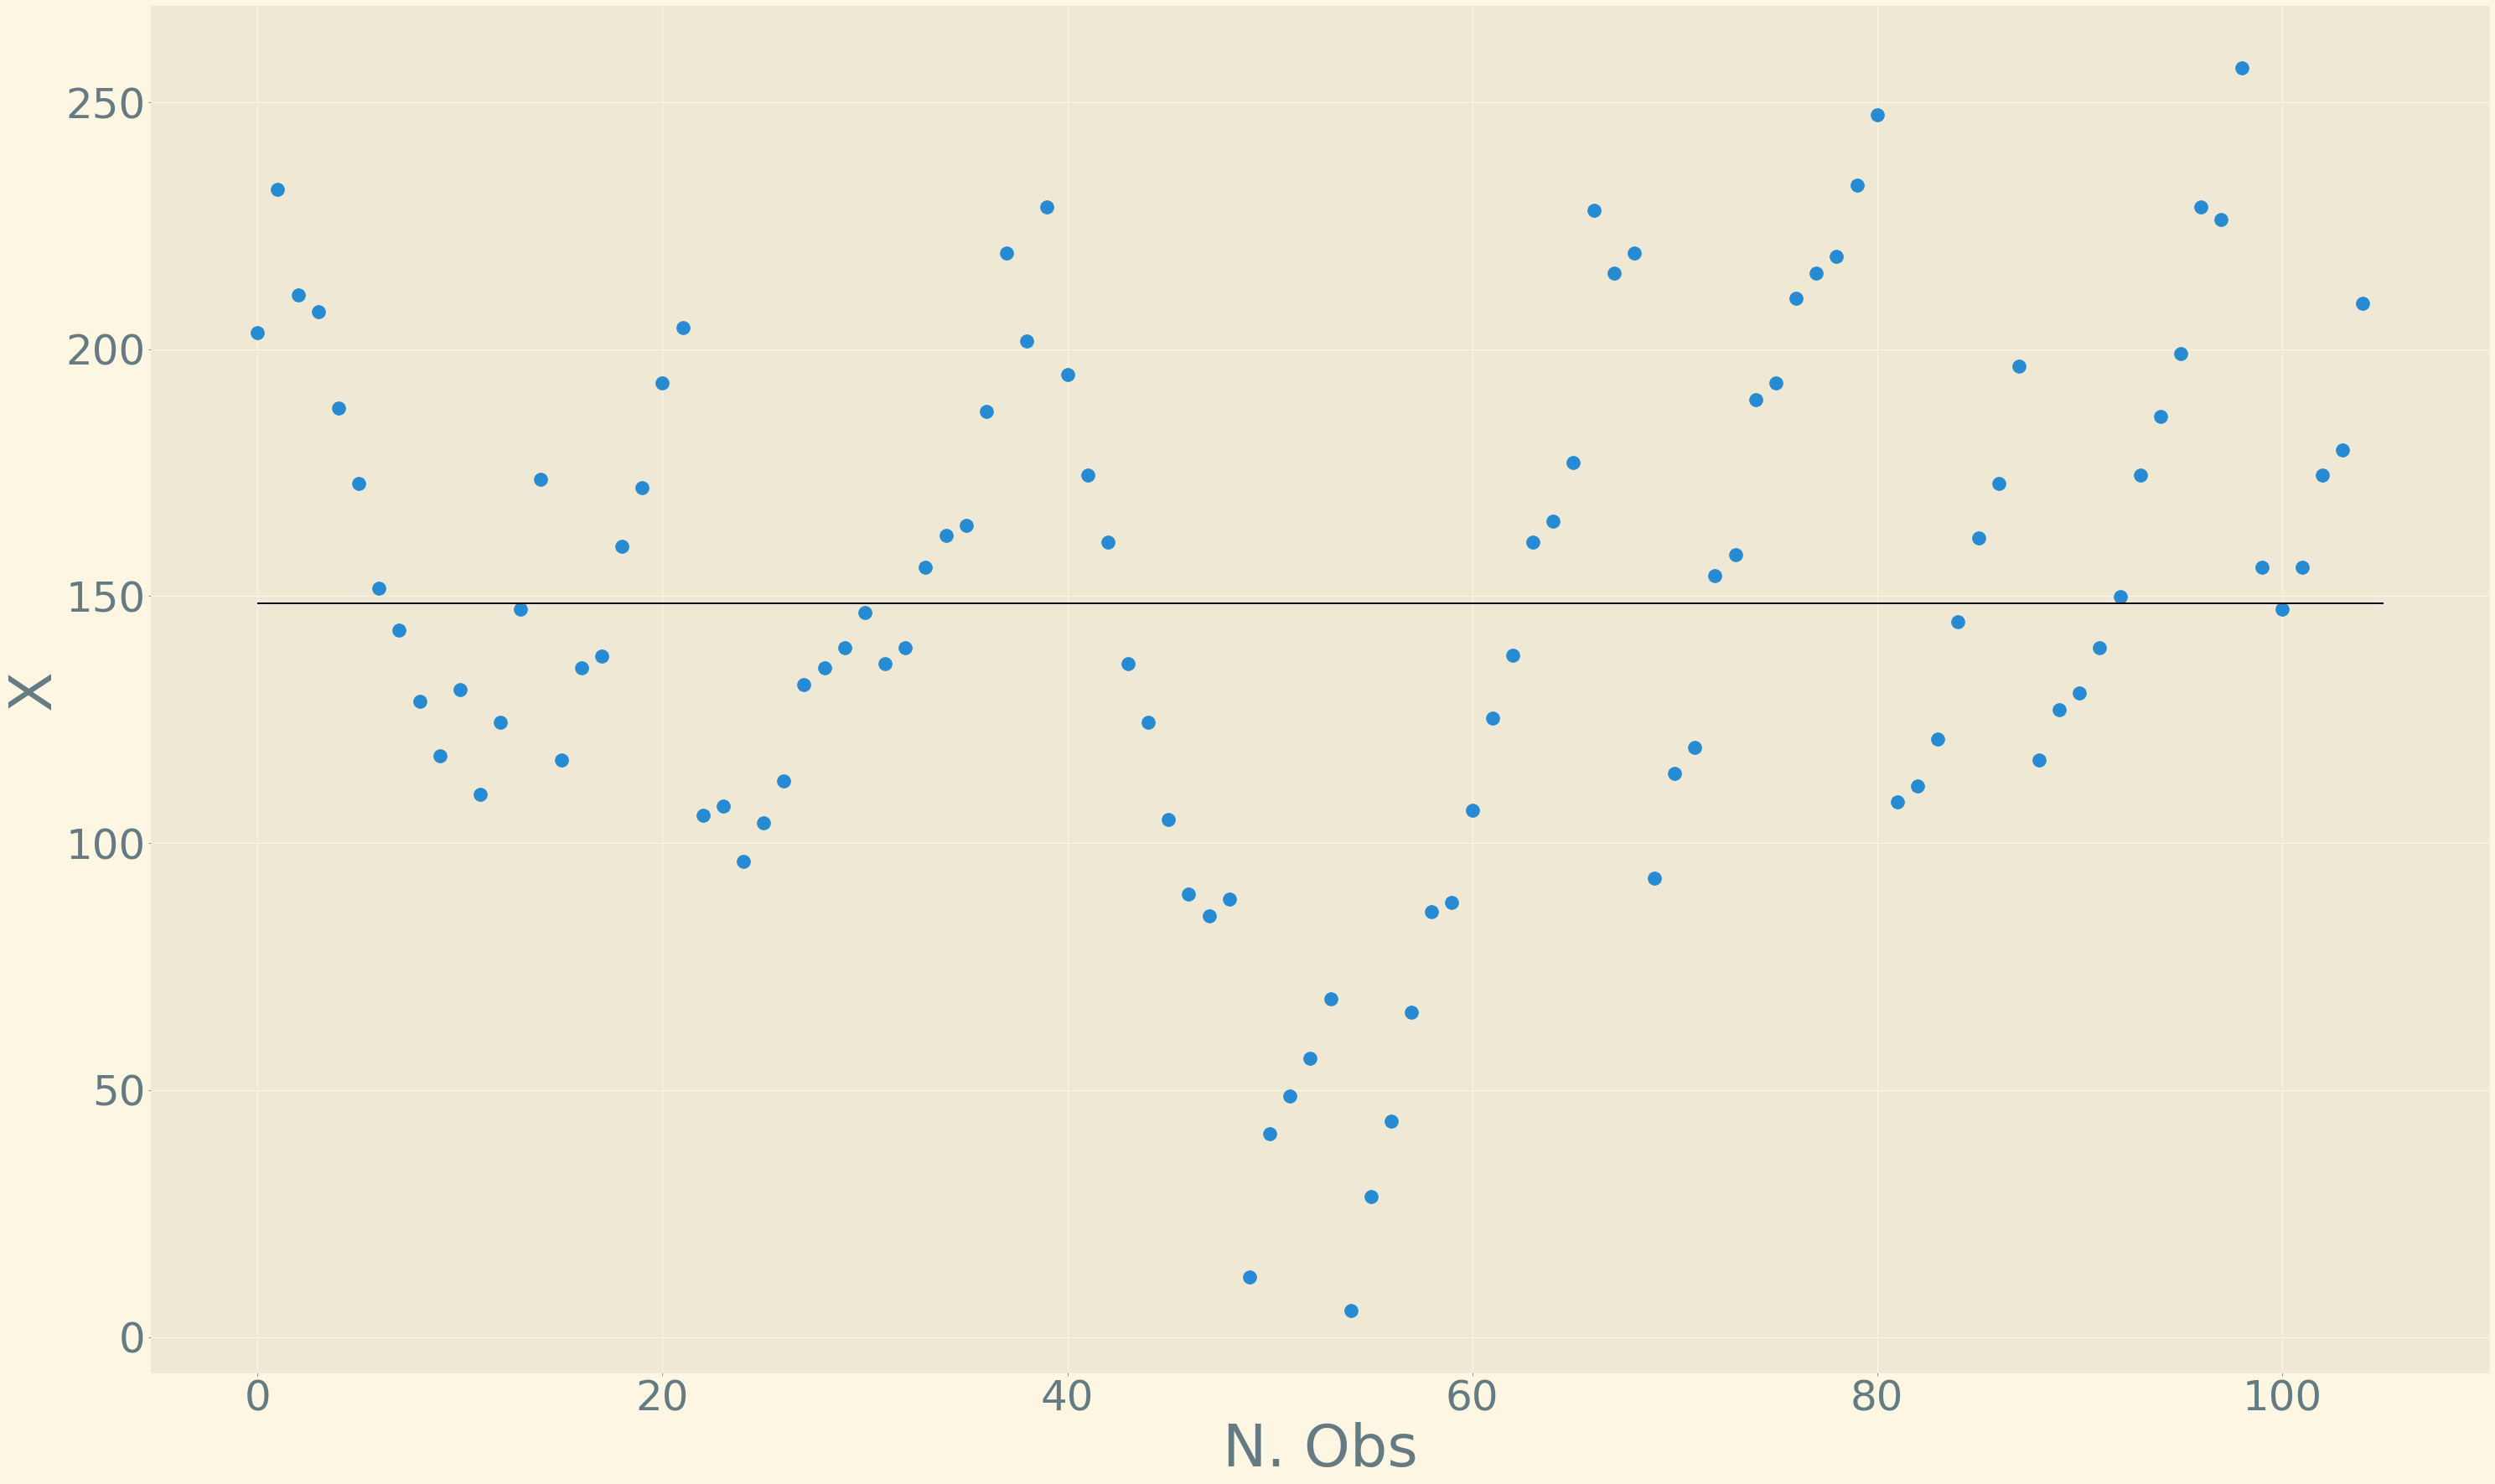

In [59]:
fig = plt.figure(figsize = (50, 30))
plt.scatter(range(N_1),Y, s = 244, )
plt.xlabel("N. Obs", fontsize = 70)
plt.xticks(fontsize = 50);
plt.ylabel("X", fontsize = 70)
plt.yticks(fontsize = 50)
plt.hlines(np.mean(Y), 0, N_1, color = "black");

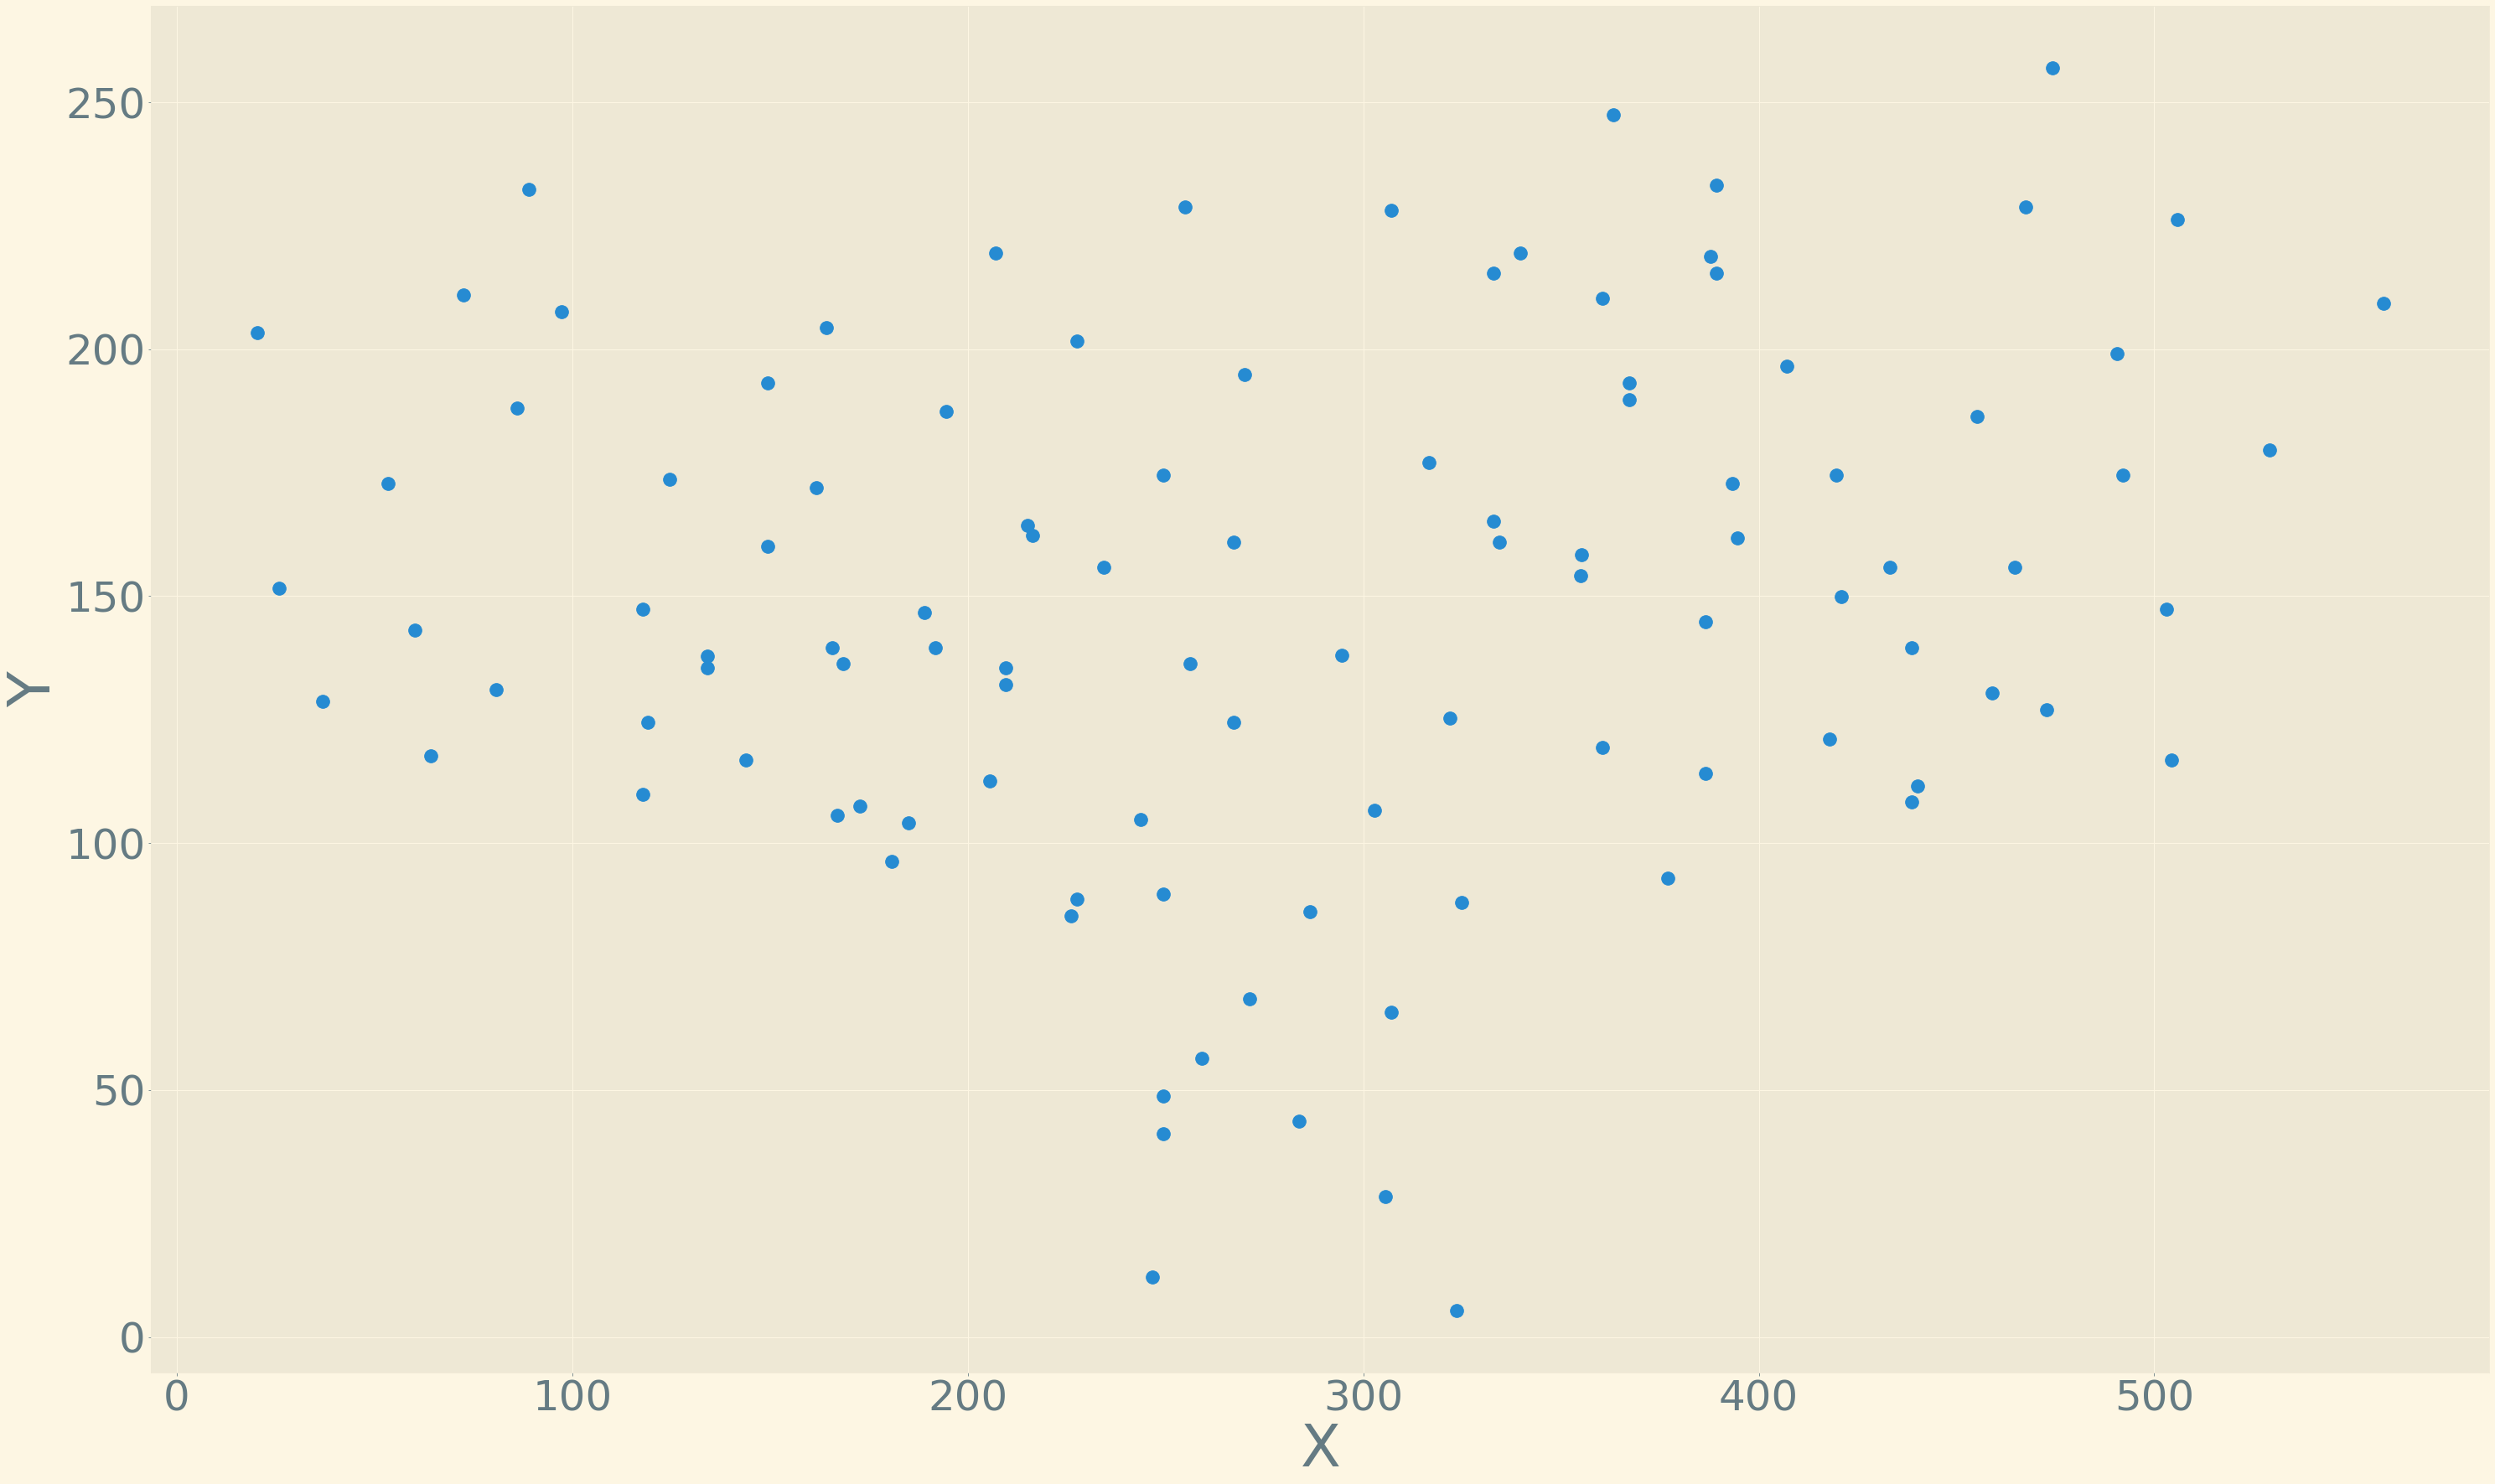

In [60]:
fig = plt.figure(figsize = (50, 30))
plt.scatter(X,Y, s = 244, )
plt.xlabel("X", fontsize = 70)
plt.xticks(fontsize = 50);
plt.ylabel("Y", fontsize = 70)
plt.yticks(fontsize = 50);


In [61]:
G(X) > calculate_critical_value(N_1, 0.05)

False

In [82]:
posibles_impactos = np.array(
   [ 
    [min(X), min(Y)],
    [min(X), max(Y)],
    [max(X), min(Y)],
    [max(X), max(Y)],
]
)

In [87]:
with open("wald_1x.csv") as f:
    X_Y = f.readlines()
x_y = [list(map(str.strip, x.split("\t"))) for x in X_Y]
X = np.array([float(x[0]) for x in x_y])
Y = np.array([float(y[1]) for y in x_y])
X_Y = np.array([[float(x), float(y)] for x,y in x_y])
N_1 = len(X)

posibles_impactos = np.array(
   [ 
    [max(X), max(Y)],
    [max(X), max(Y)],
    [max(X), max(Y)],
    [max(X), max(Y)],
]
)

impacto = posibles_impactos[np.random.randint(4,size = 1)][0]
G_historico = []
critical_value_historico = []
impacto_historico = []
std_proporcion_historico = []
N = N_1
alpha = 0.005
salto = 1
while True:
    X = np.append(X, impacto[0] + salto * (N - N_1))# np.mean(X)) 
    Y = np.append(Y, impacto[1])
    N += 1
    G_ = G(X)
    std_proporcion = (np.mean(X) - impacto[0]) / np.std(X)
    critical_value = calculate_critical_value(N, alpha)
    print("Impacto: {},{}, Grubbs Critical Value: {}, G:{}, Proporción std: {}".format(round(impacto[0],2), round(impacto[1],2), round(critical_value,2), round(G_,2),  round(std_proporcion,2)))
    print(G_)
    G_historico.append(G_)
    critical_value_historico.append(critical_value)
    impacto_historico.append(impacto)
    std_proporcion_historico.append(std_proporcion)
    if G_ > critical_value or G(Y) > critical_value:
        break
        
    impacto = posibles_impactos[np.random.randint(4,size = 1)][0]
    
    
    

Impacto: 557.9,256.9, Grubbs Critical Value: 3.92, G:2.06, Proporción std: -2.06
2.055916237072809
Impacto: 557.9,256.9, Grubbs Critical Value: 3.92, G:2.01, Proporción std: -2.01
2.0140581136901625
Impacto: 557.9,256.9, Grubbs Critical Value: 3.93, G:1.98, Proporción std: -1.96
1.975038039734992
Impacto: 557.9,256.9, Grubbs Critical Value: 3.93, G:1.94, Proporción std: -1.92
1.9420233740948862
Impacto: 557.9,256.9, Grubbs Critical Value: 3.93, G:1.94, Proporción std: -1.88
1.935652614170505
Impacto: 557.9,256.9, Grubbs Critical Value: 3.94, G:1.93, Proporción std: -1.84
1.9302188415378556
Impacto: 557.9,256.9, Grubbs Critical Value: 3.94, G:1.93, Proporción std: -1.8
1.925623802930577
Impacto: 557.9,256.9, Grubbs Critical Value: 3.94, G:1.92, Proporción std: -1.77
1.921782021591456
Impacto: 557.9,256.9, Grubbs Critical Value: 3.95, G:1.92, Proporción std: -1.73
1.9186187817240994
Impacto: 557.9,256.9, Grubbs Critical Value: 3.95, G:1.92, Proporción std: -1.7
1.9160684849746688
Impacto

Impacto: 557.9,256.9, Grubbs Critical Value: 4.34, G:2.74, Proporción std: 0.24
2.7414031502249627
Impacto: 557.9,256.9, Grubbs Critical Value: 4.34, G:2.74, Proporción std: 0.24
2.7425447686886786
Impacto: 557.9,256.9, Grubbs Critical Value: 4.34, G:2.74, Proporción std: 0.25
2.743677818561597
Impacto: 557.9,256.9, Grubbs Critical Value: 4.34, G:2.74, Proporción std: 0.25
2.7448023359098364
Impacto: 557.9,256.9, Grubbs Critical Value: 4.34, G:2.75, Proporción std: 0.25
2.74591835671295
Impacto: 557.9,256.9, Grubbs Critical Value: 4.34, G:2.75, Proporción std: 0.25
2.747025916863567
Impacto: 557.9,256.9, Grubbs Critical Value: 4.34, G:2.75, Proporción std: 0.26
2.7481250521670257
Impacto: 557.9,256.9, Grubbs Critical Value: 4.34, G:2.75, Proporción std: 0.26
2.7492157983410204
Impacto: 557.9,256.9, Grubbs Critical Value: 4.34, G:2.75, Proporción std: 0.26
2.750298191015259
Impacto: 557.9,256.9, Grubbs Critical Value: 4.34, G:2.75, Proporción std: 0.26
2.7513722657311277
Impacto: 557.9,

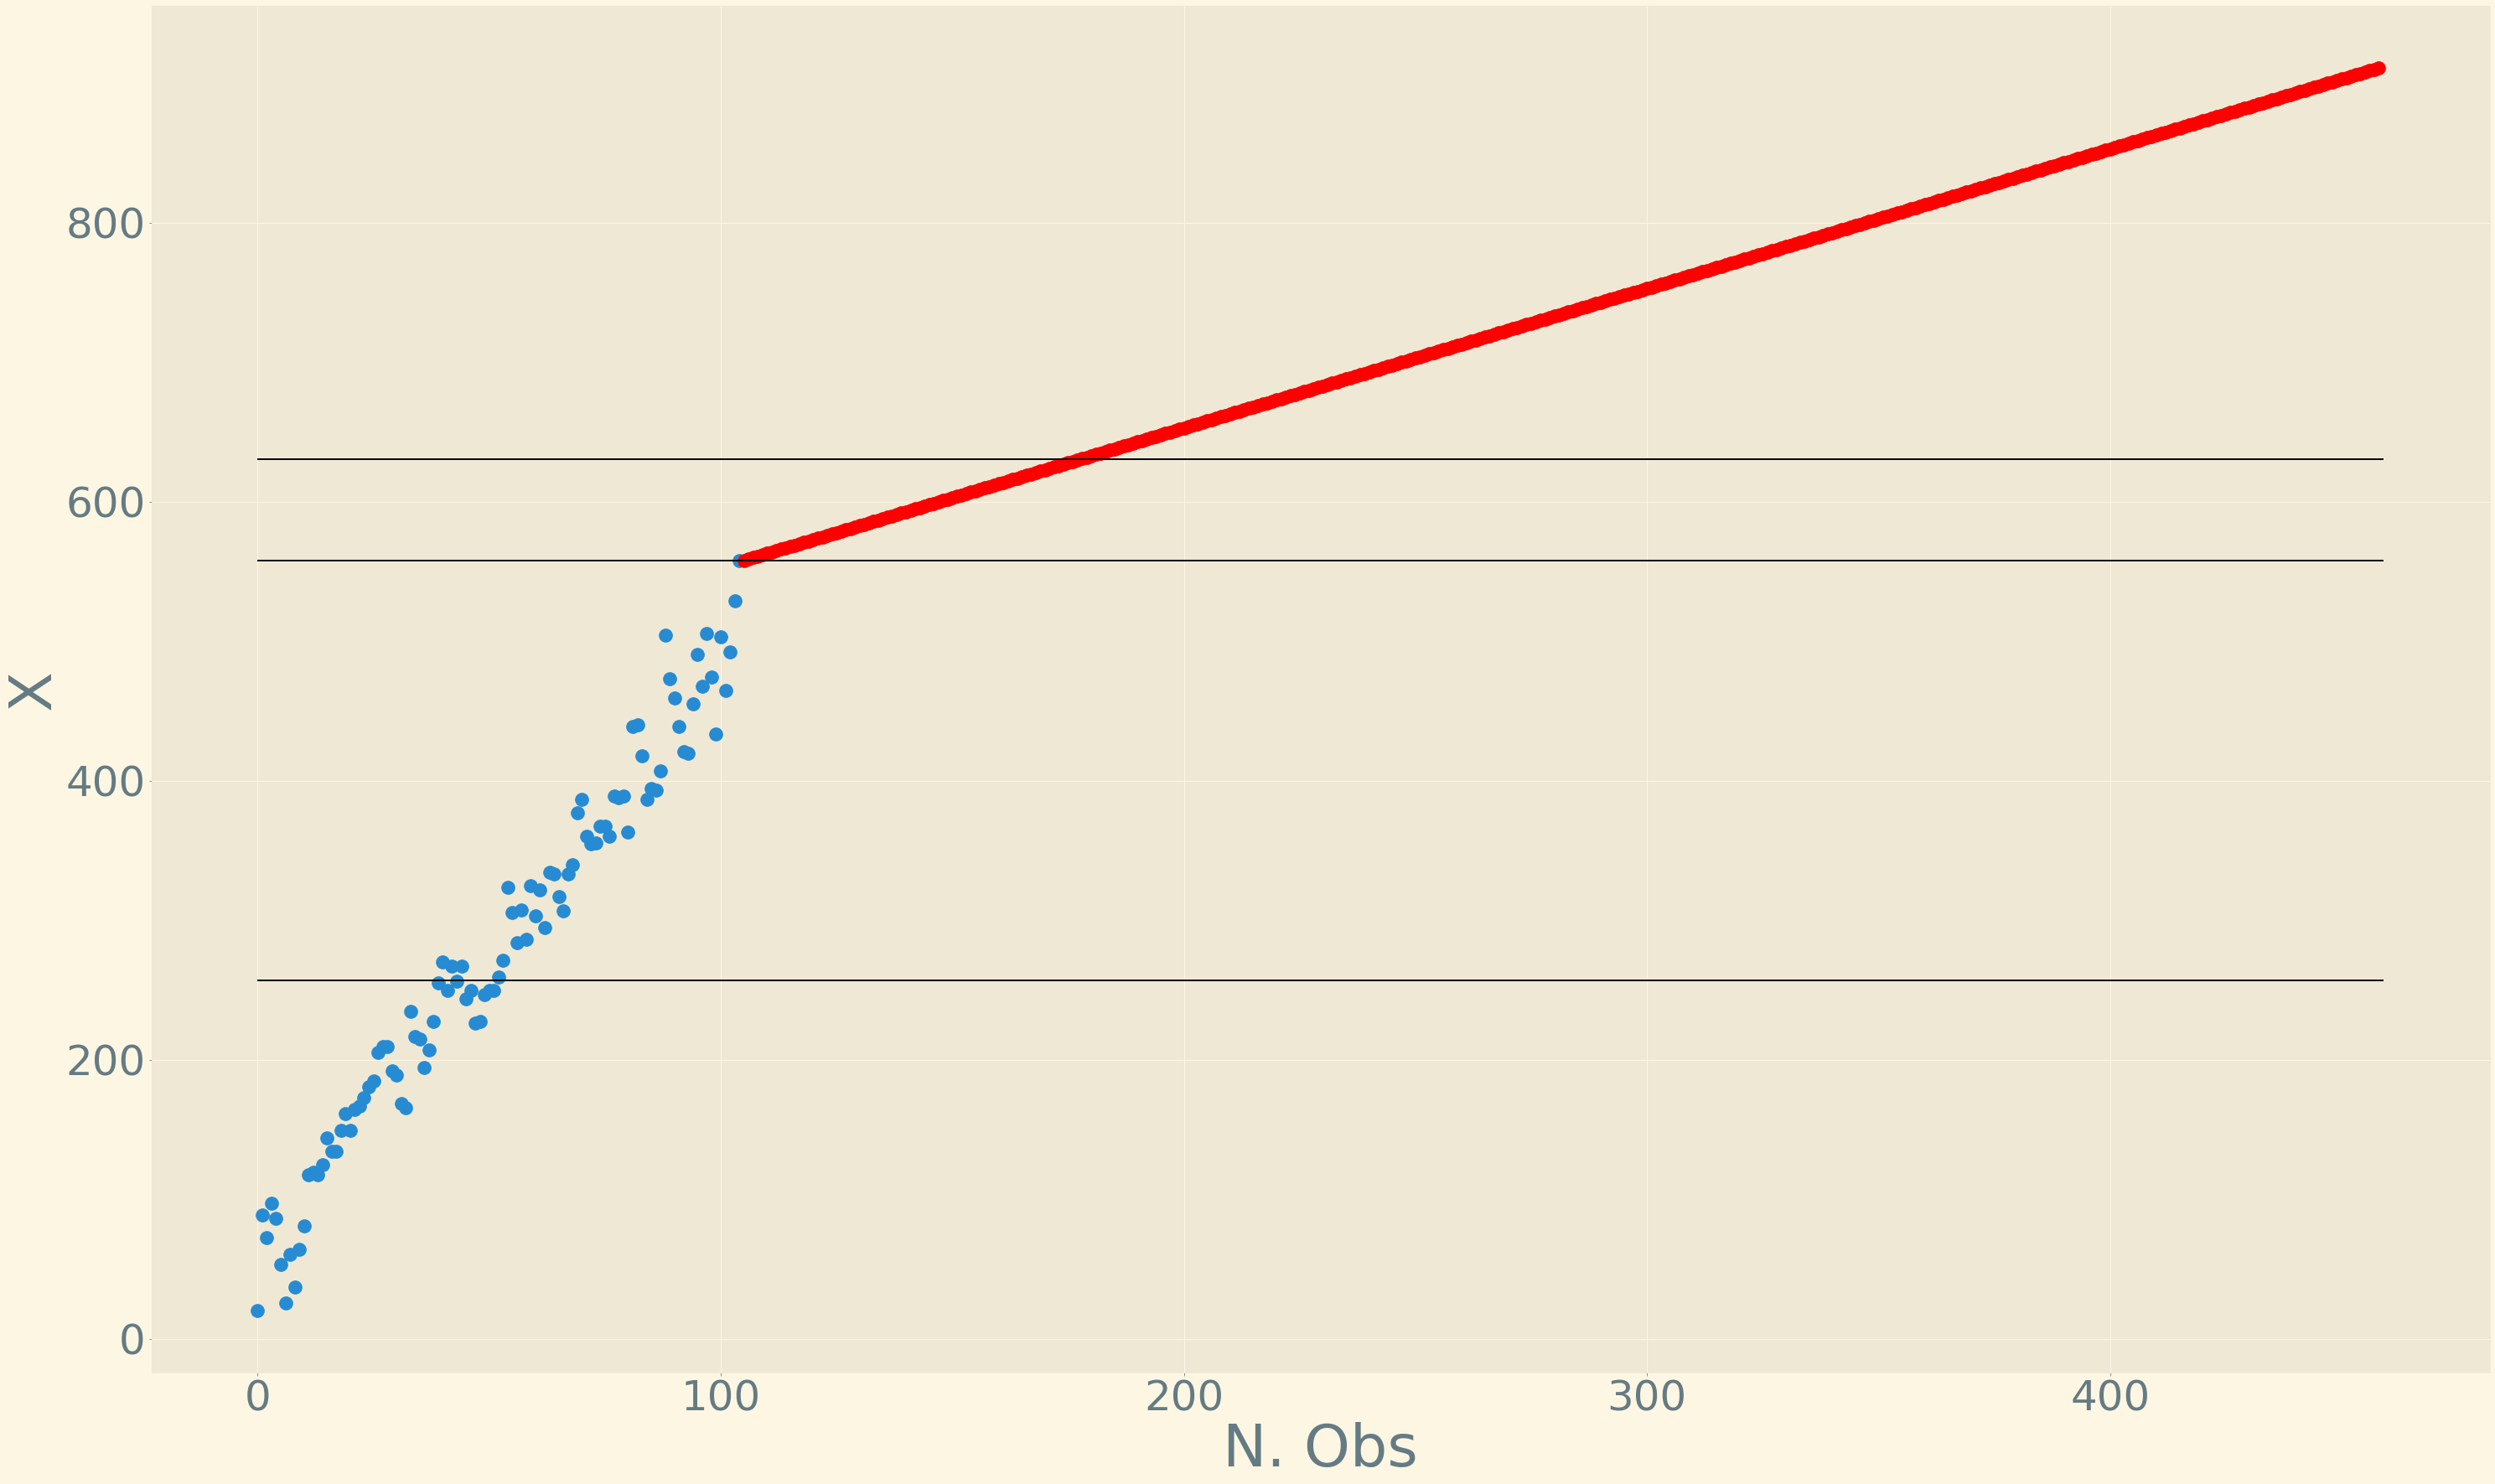

In [88]:
fig = plt.figure(figsize = (50, 30))
plt.scatter(range(N_1),X[:N_1], s = 244, label = "original")
plt.scatter(range(N_1, N),X[N_1: N], s = 244, label = "impactos", c = "r")

plt.xlabel("N. Obs", fontsize = 70)
plt.xticks(fontsize = 50);
plt.ylabel("X", fontsize = 70)
plt.hlines(impacto, 0, N, color = "black")
plt.yticks(fontsize = 50)
plt.hlines(np.mean(X), 0, N, color = "black");

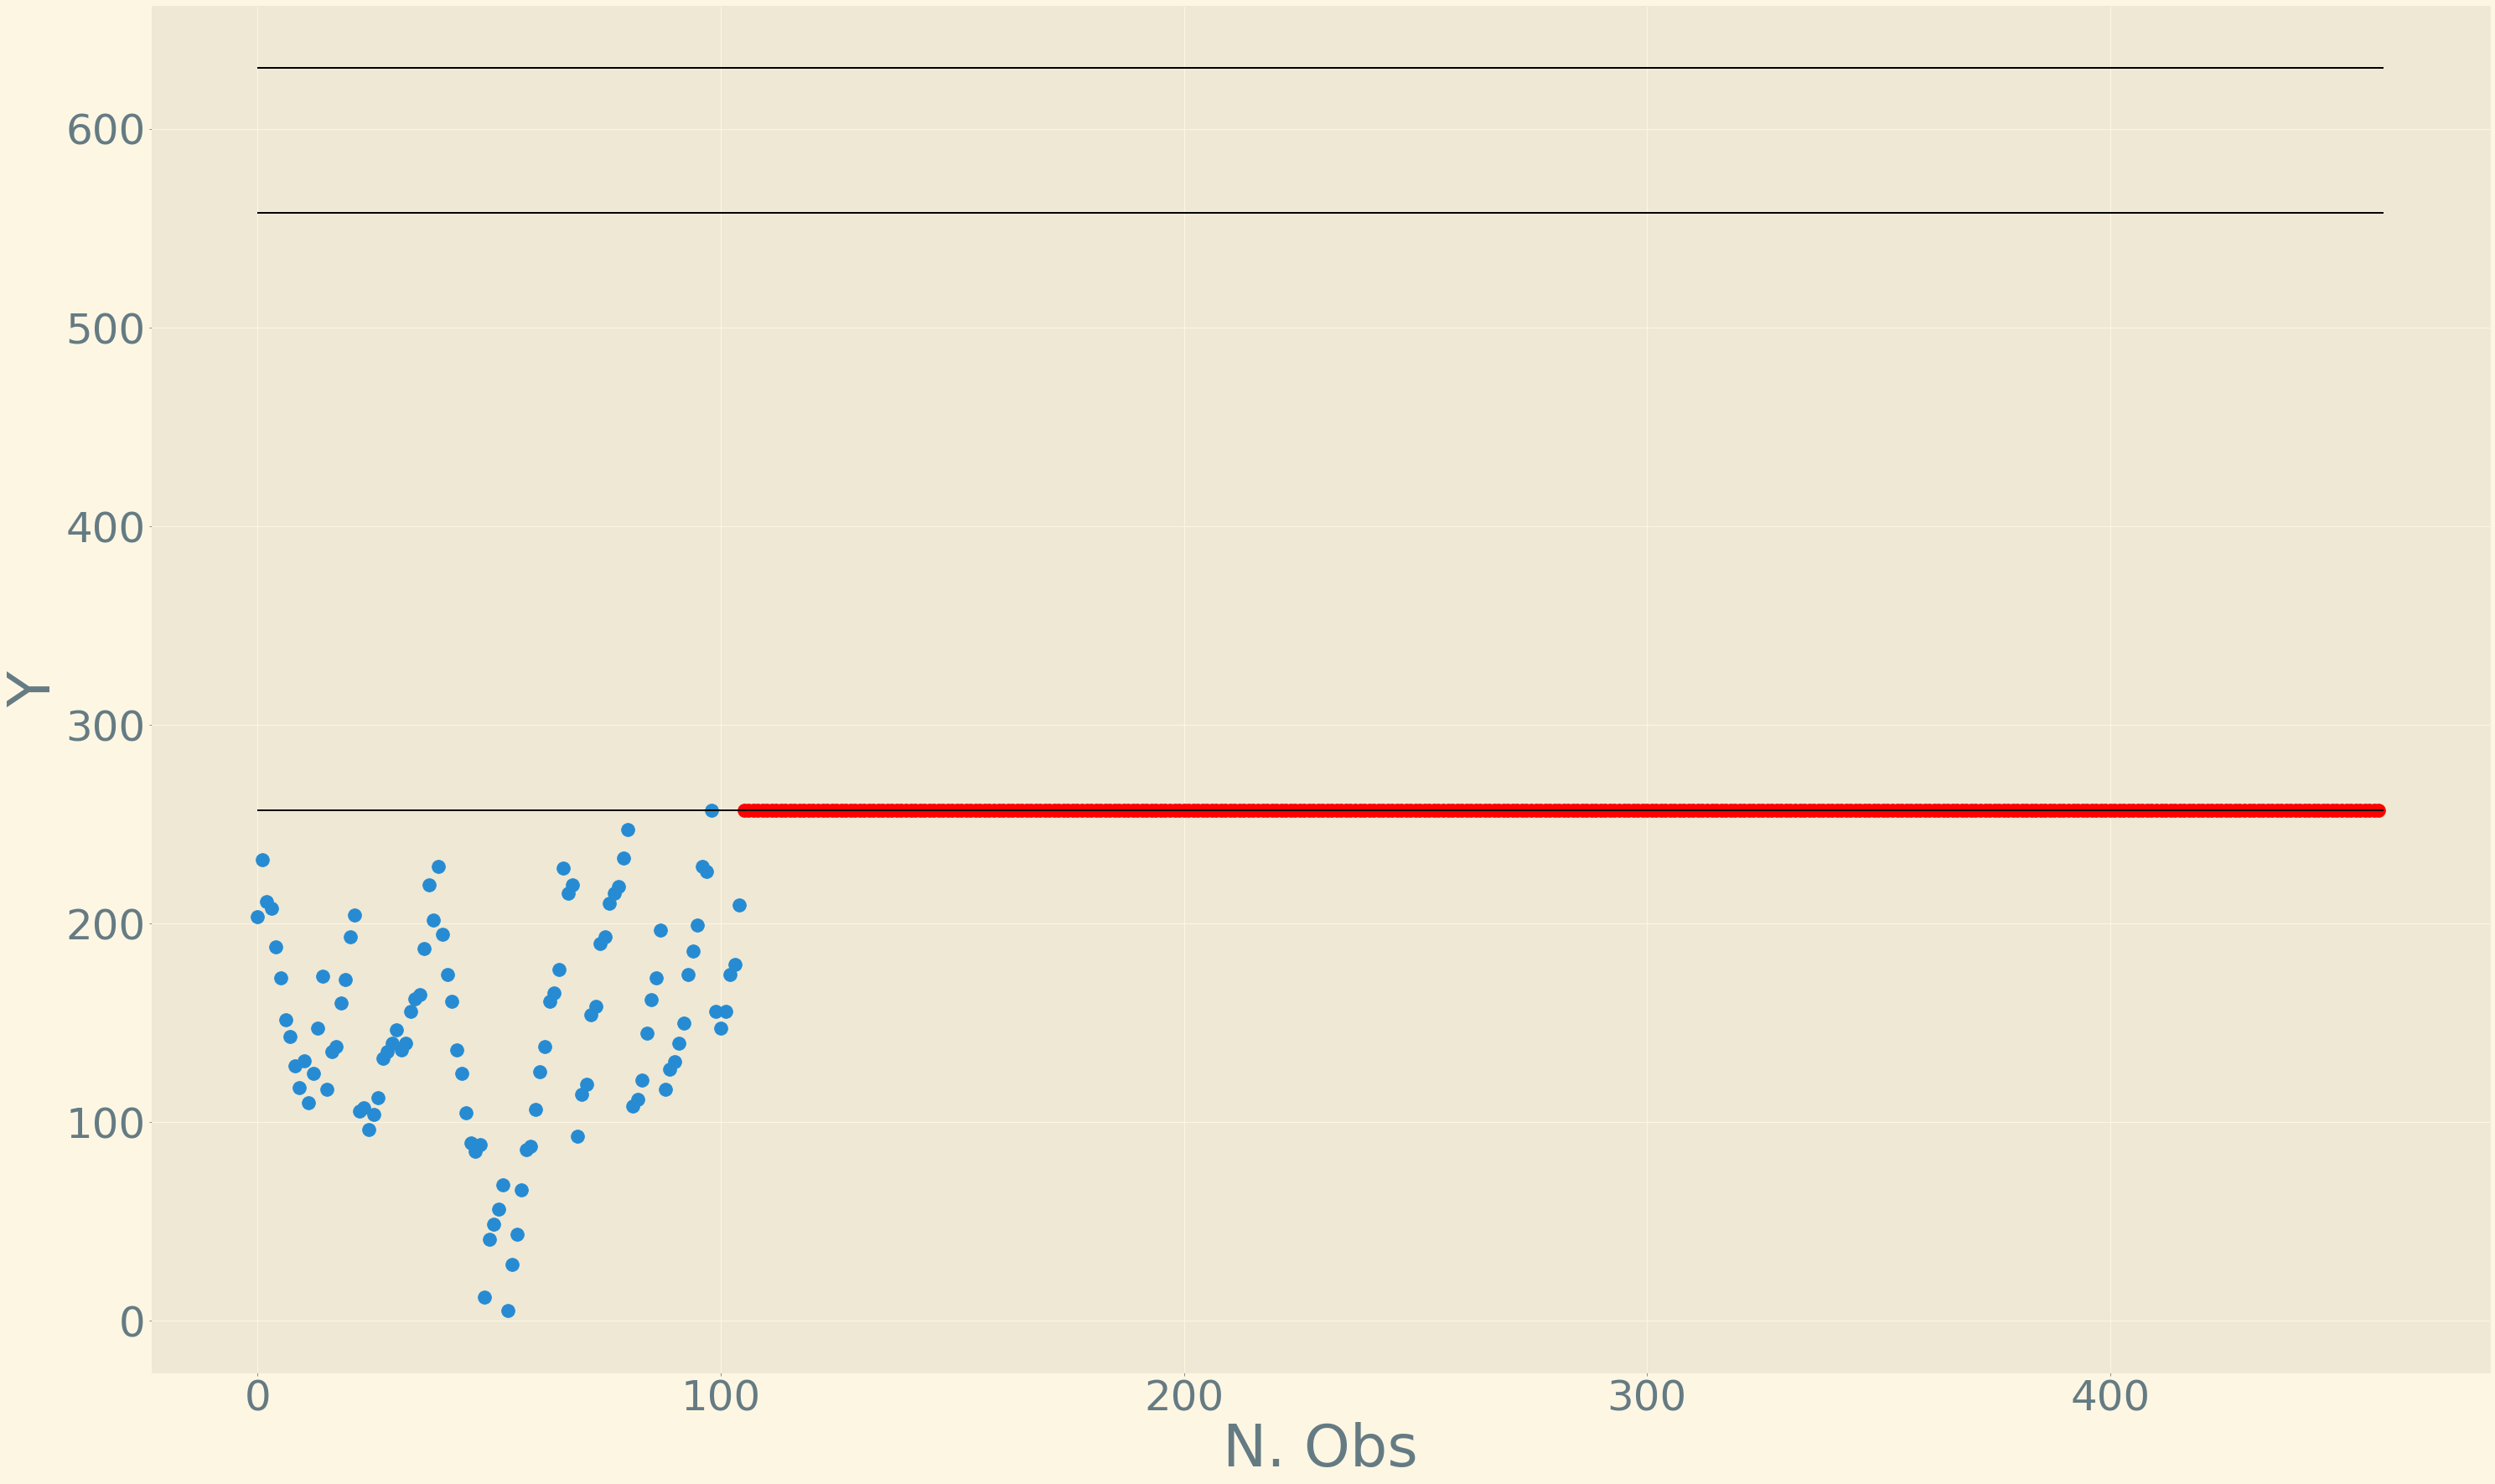

In [89]:
fig = plt.figure(figsize = (50, 30))
plt.scatter(range(N_1),Y[:N_1], s = 244, label = "original")
plt.scatter(range(N_1, N),Y[N_1: N], s = 244, label = "impactos", c = "r")

plt.xlabel("N. Obs", fontsize = 70)
plt.xticks(fontsize = 50);
plt.ylabel("Y", fontsize = 70)
plt.hlines(impacto, 0, N, color = "black")
plt.yticks(fontsize = 50)
plt.hlines(np.mean(X), 0, N, color = "black");

In [30]:
alphas = np.logspace(0, 1, 10000) /10
T_historico = []
salto = 0.3
X_base = np.random.normal(10, 3, 1000)
N_1 = X_base.shape[0]
impacto_base = np.min(X_base)
G_base = G(X_base)
std_historico = []
mean_historico = []
for alpha in alphas:  
    X = X_base.copy()
    N = N_1
    critical_value = calculate_critical_value(N, alpha)
    G_ = G_base
    impacto = impacto_base
    while G_ < critical_value:
        impacto -= salto
        X = np.append(X, impacto)
        N += 1
        critical_value = calculate_critical_value(N, alpha)
        G_ = G(X)
    T_historico.append((np.mean(X) - impacto) / np.std(X))
    std_historico.append(np.std(X))
    mean_historico.append(np.mean(X))
    
    

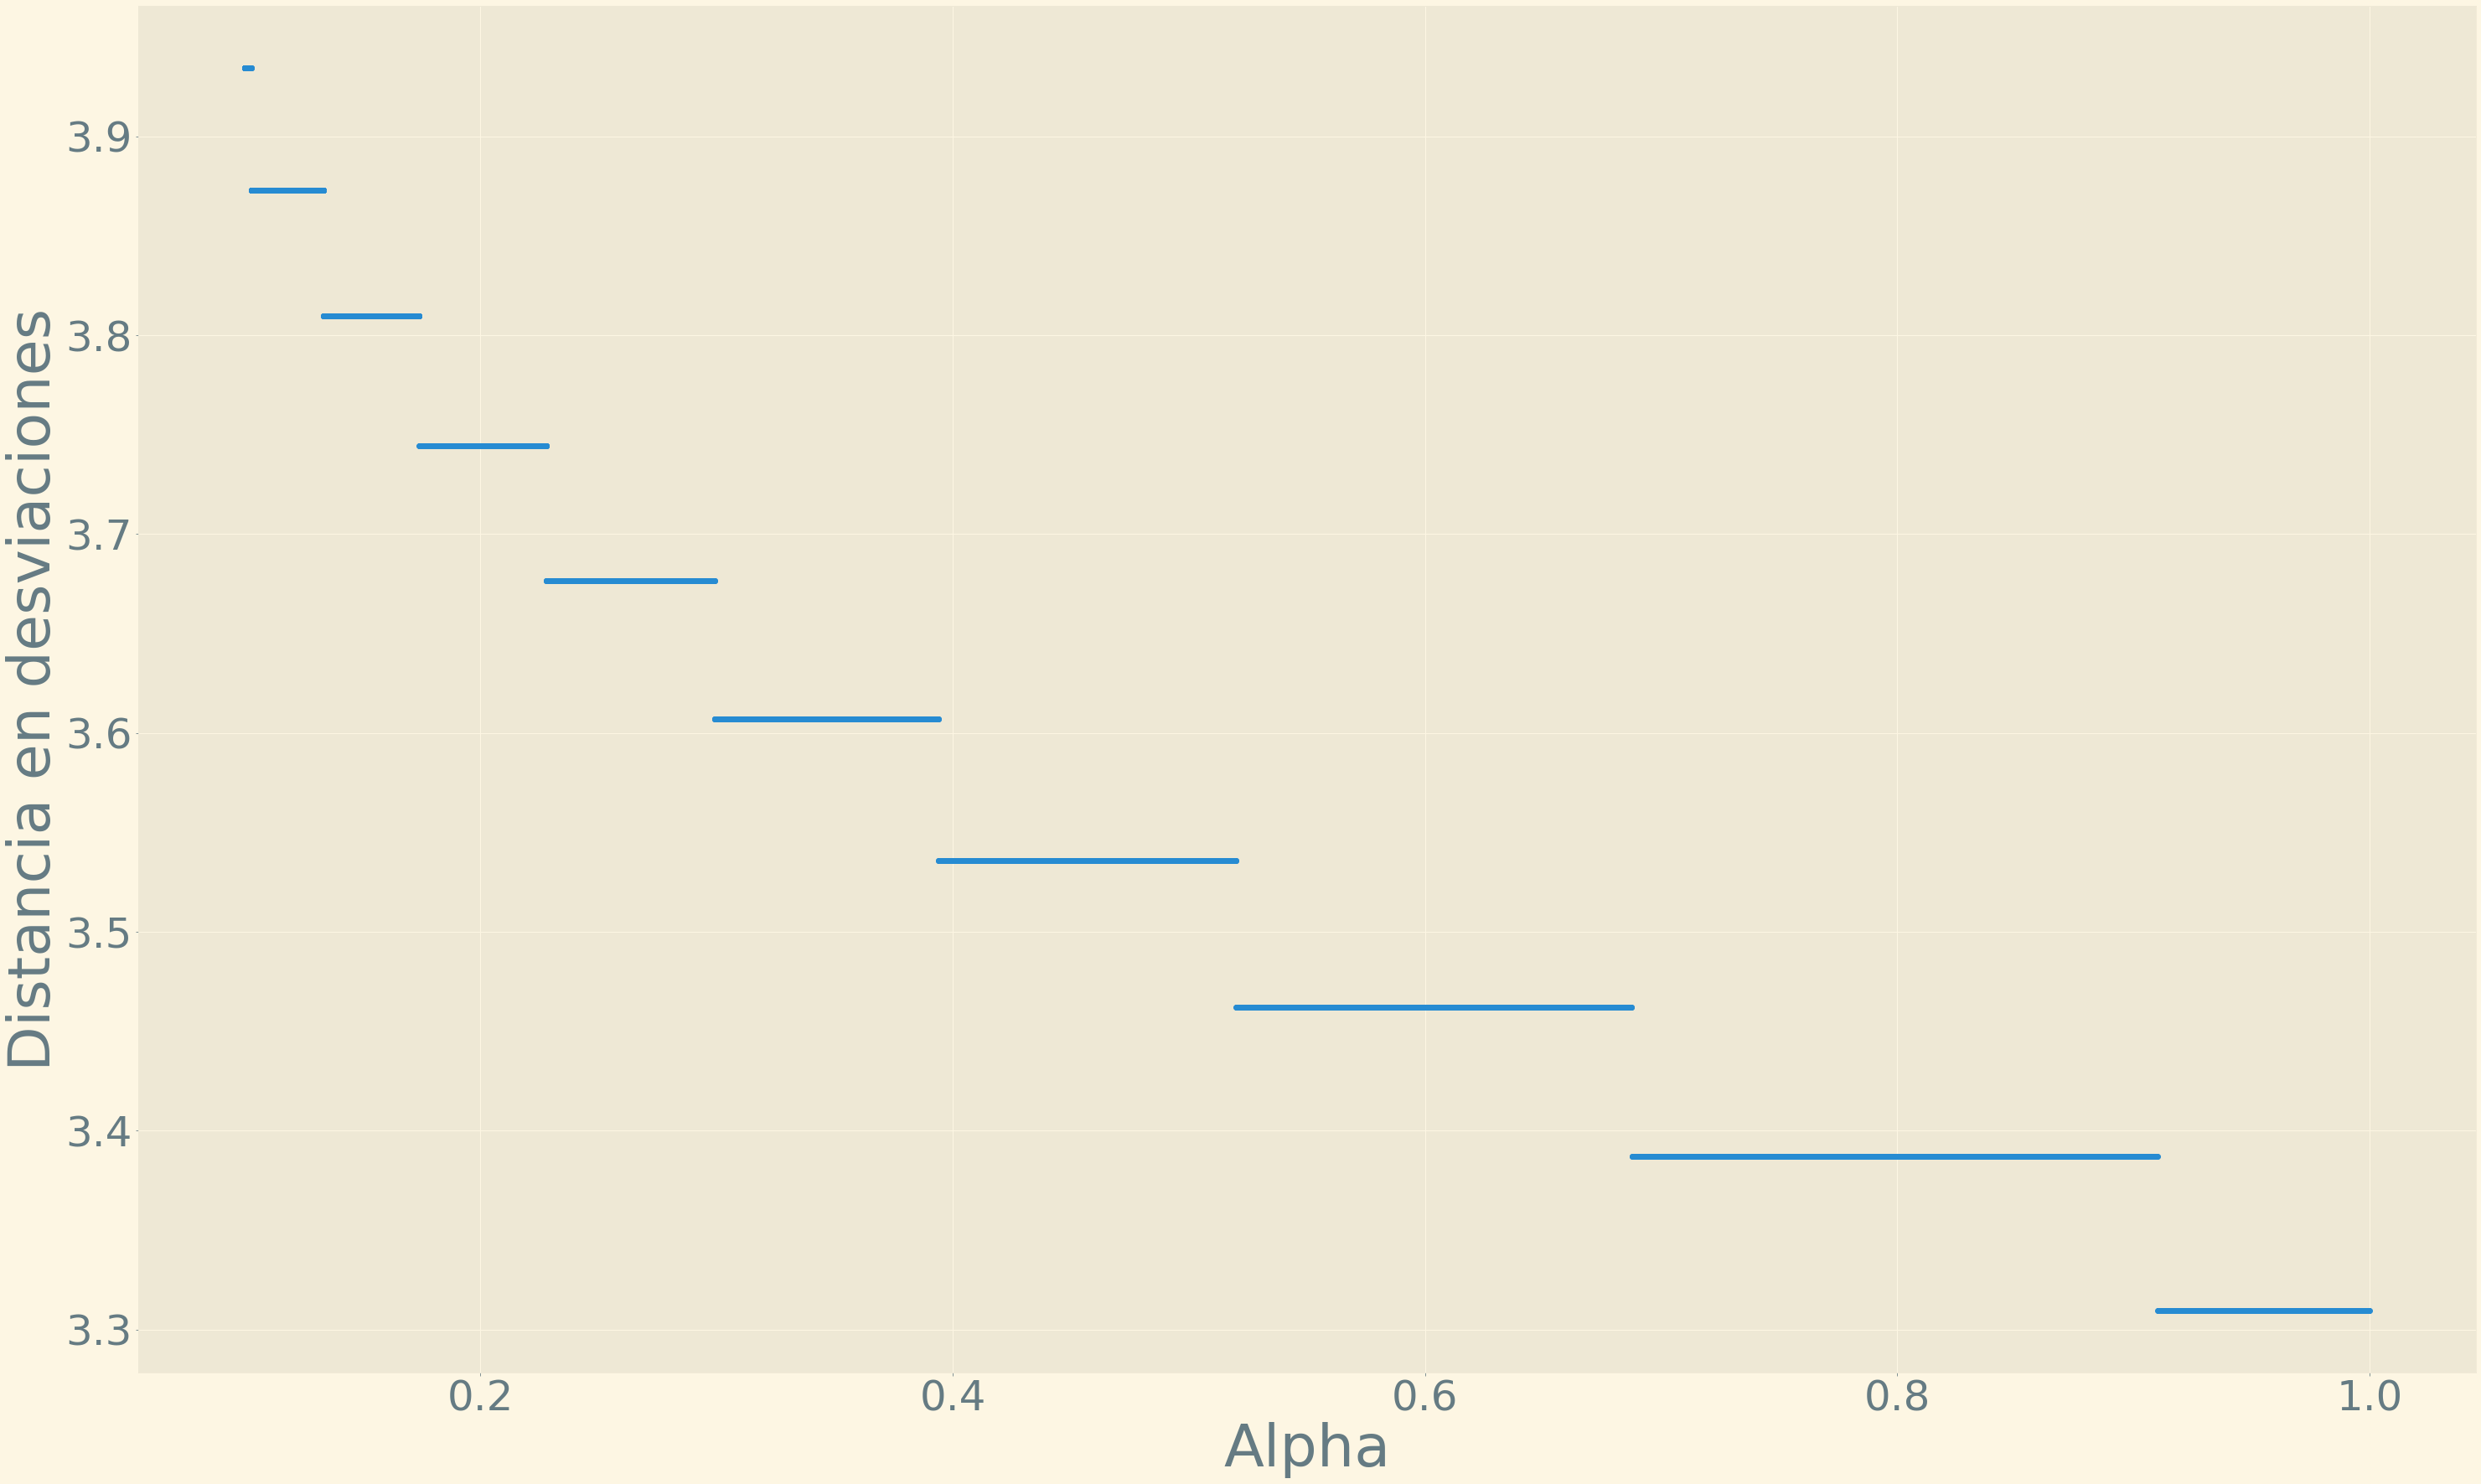

In [31]:

fig = plt.figure(figsize = (50, 30))
plt.scatter(alphas, T_historico)
plt.xlabel("Alpha", fontsize = 70)
plt.xticks(fontsize = 50);
plt.ylabel("Distancia en desviaciones", fontsize = 70)
plt.yticks(fontsize = 50);

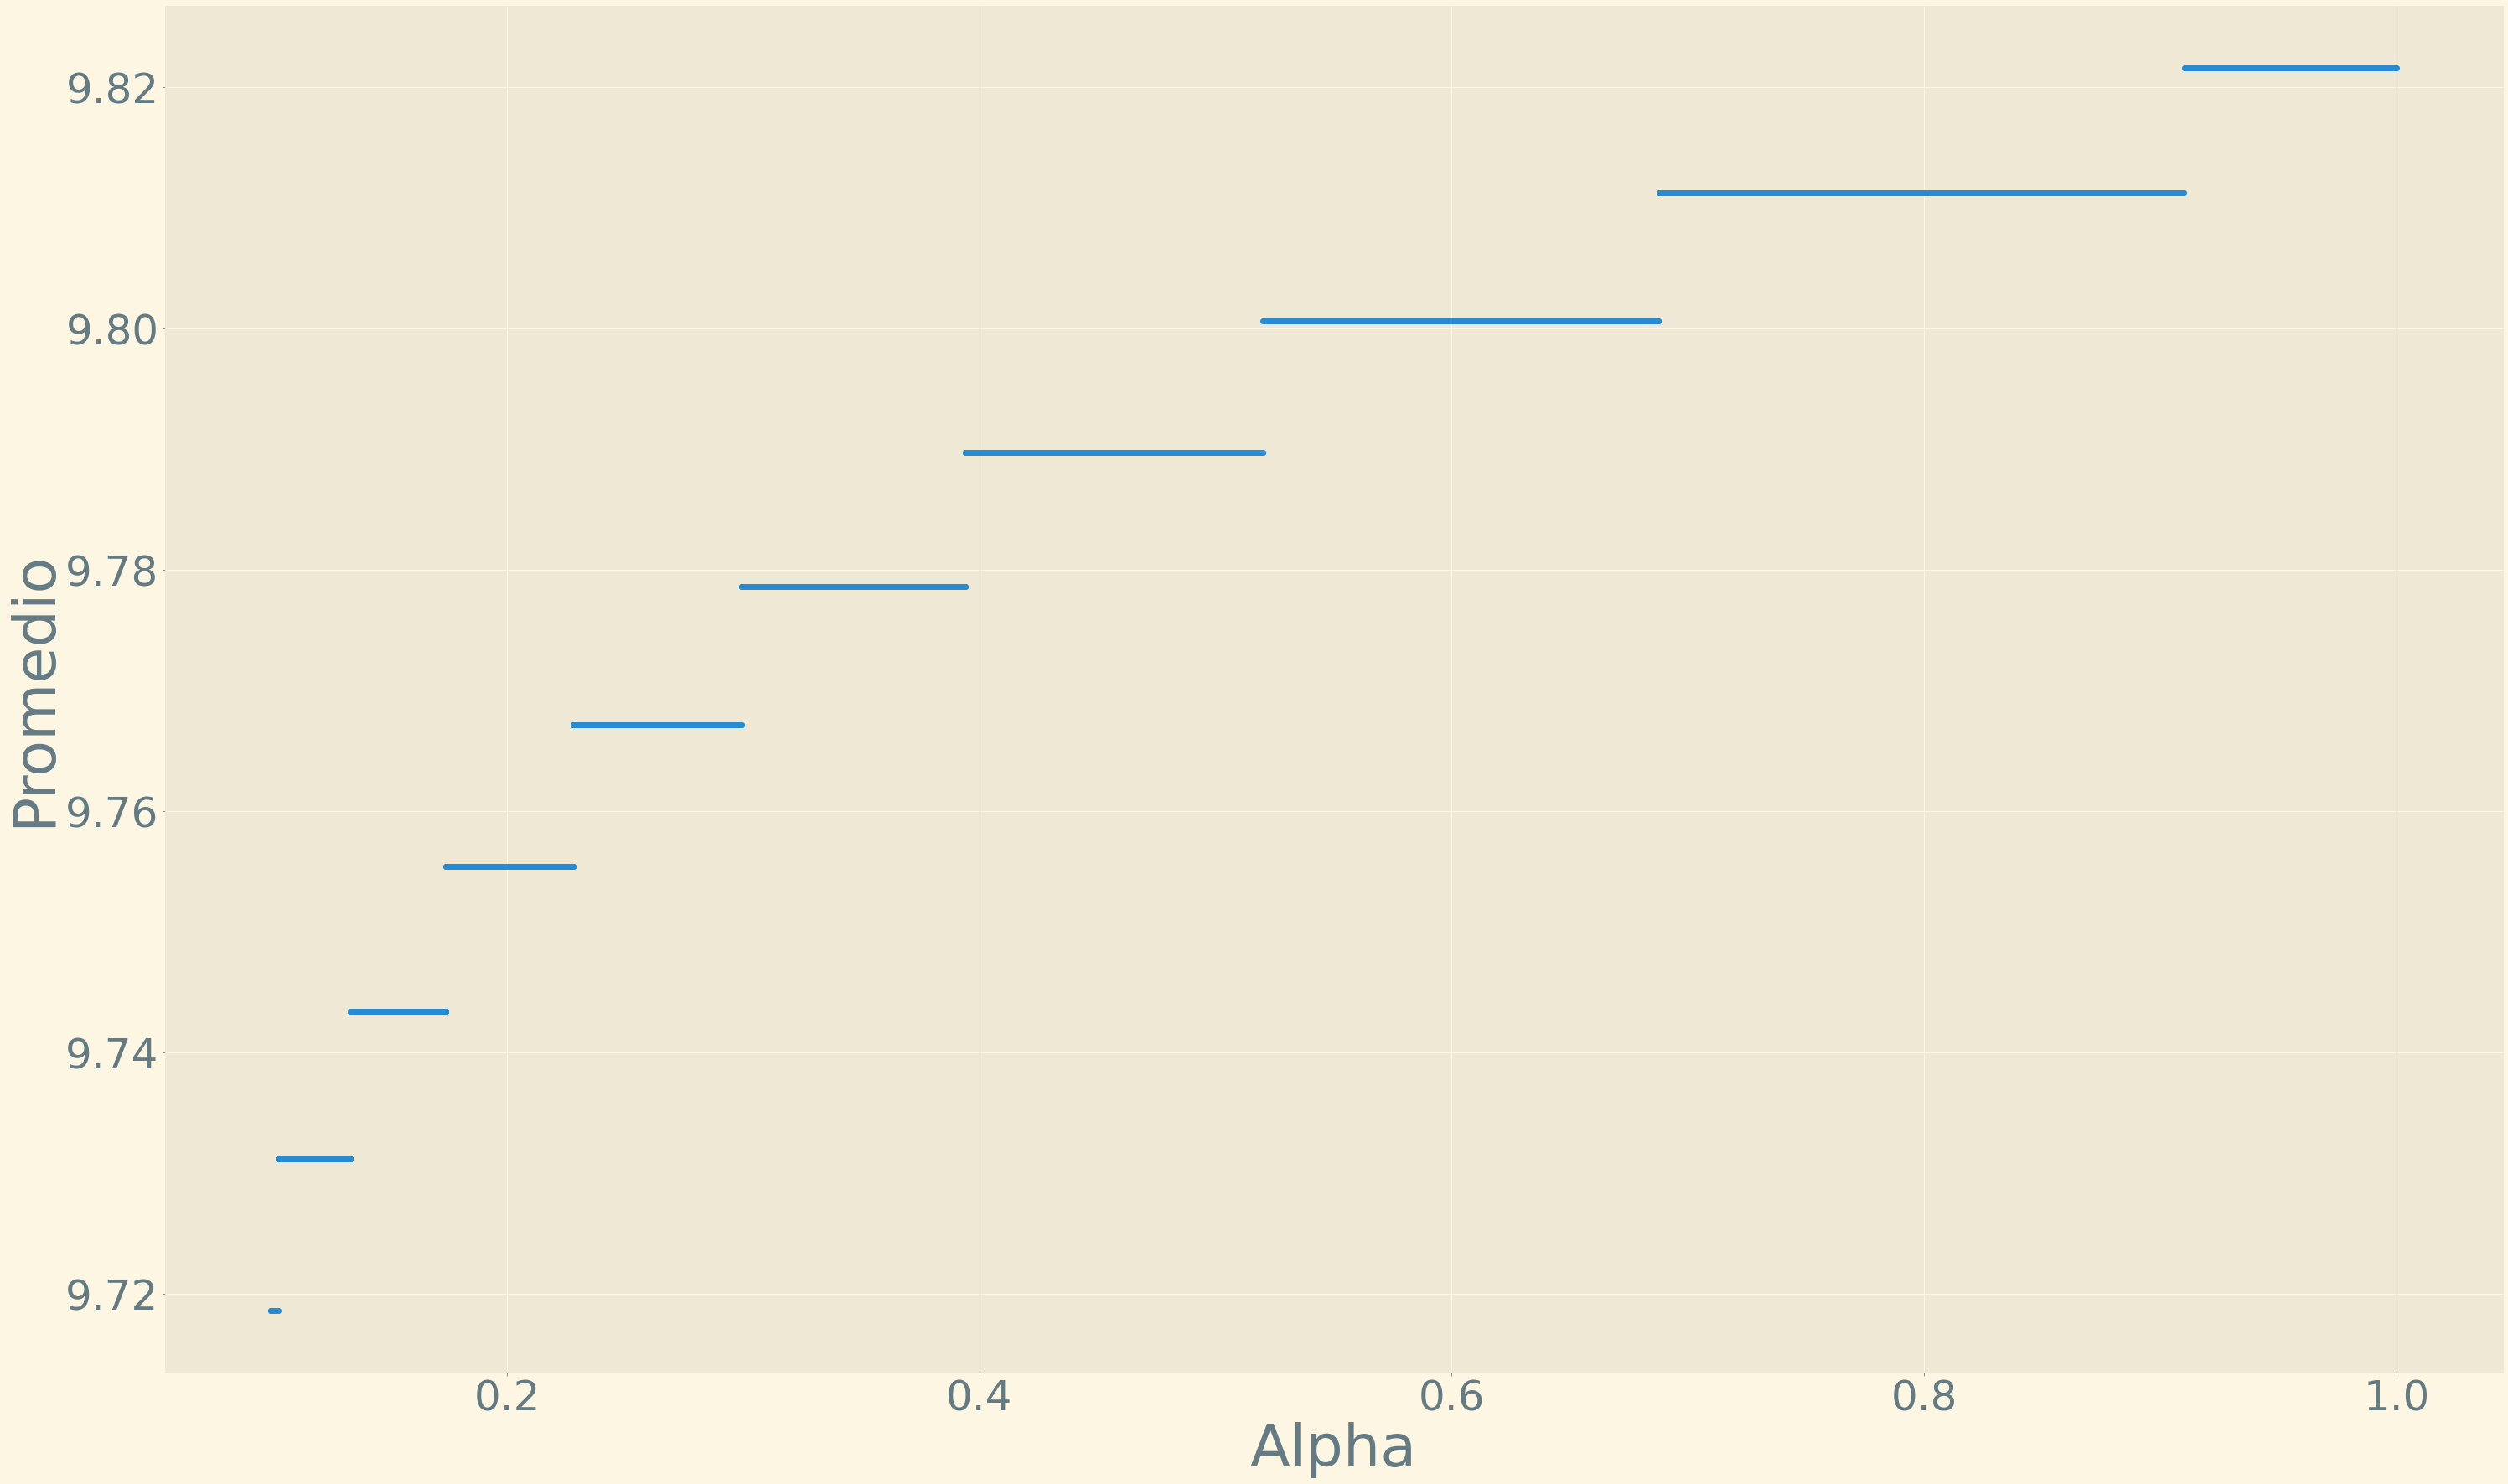

In [32]:

fig = plt.figure(figsize = (50, 30))
plt.scatter(alphas, mean_historico)
plt.xlabel("Alpha", fontsize = 70)
plt.xticks(fontsize = 50);
plt.ylabel("Promedio", fontsize = 70)
plt.yticks(fontsize = 50);

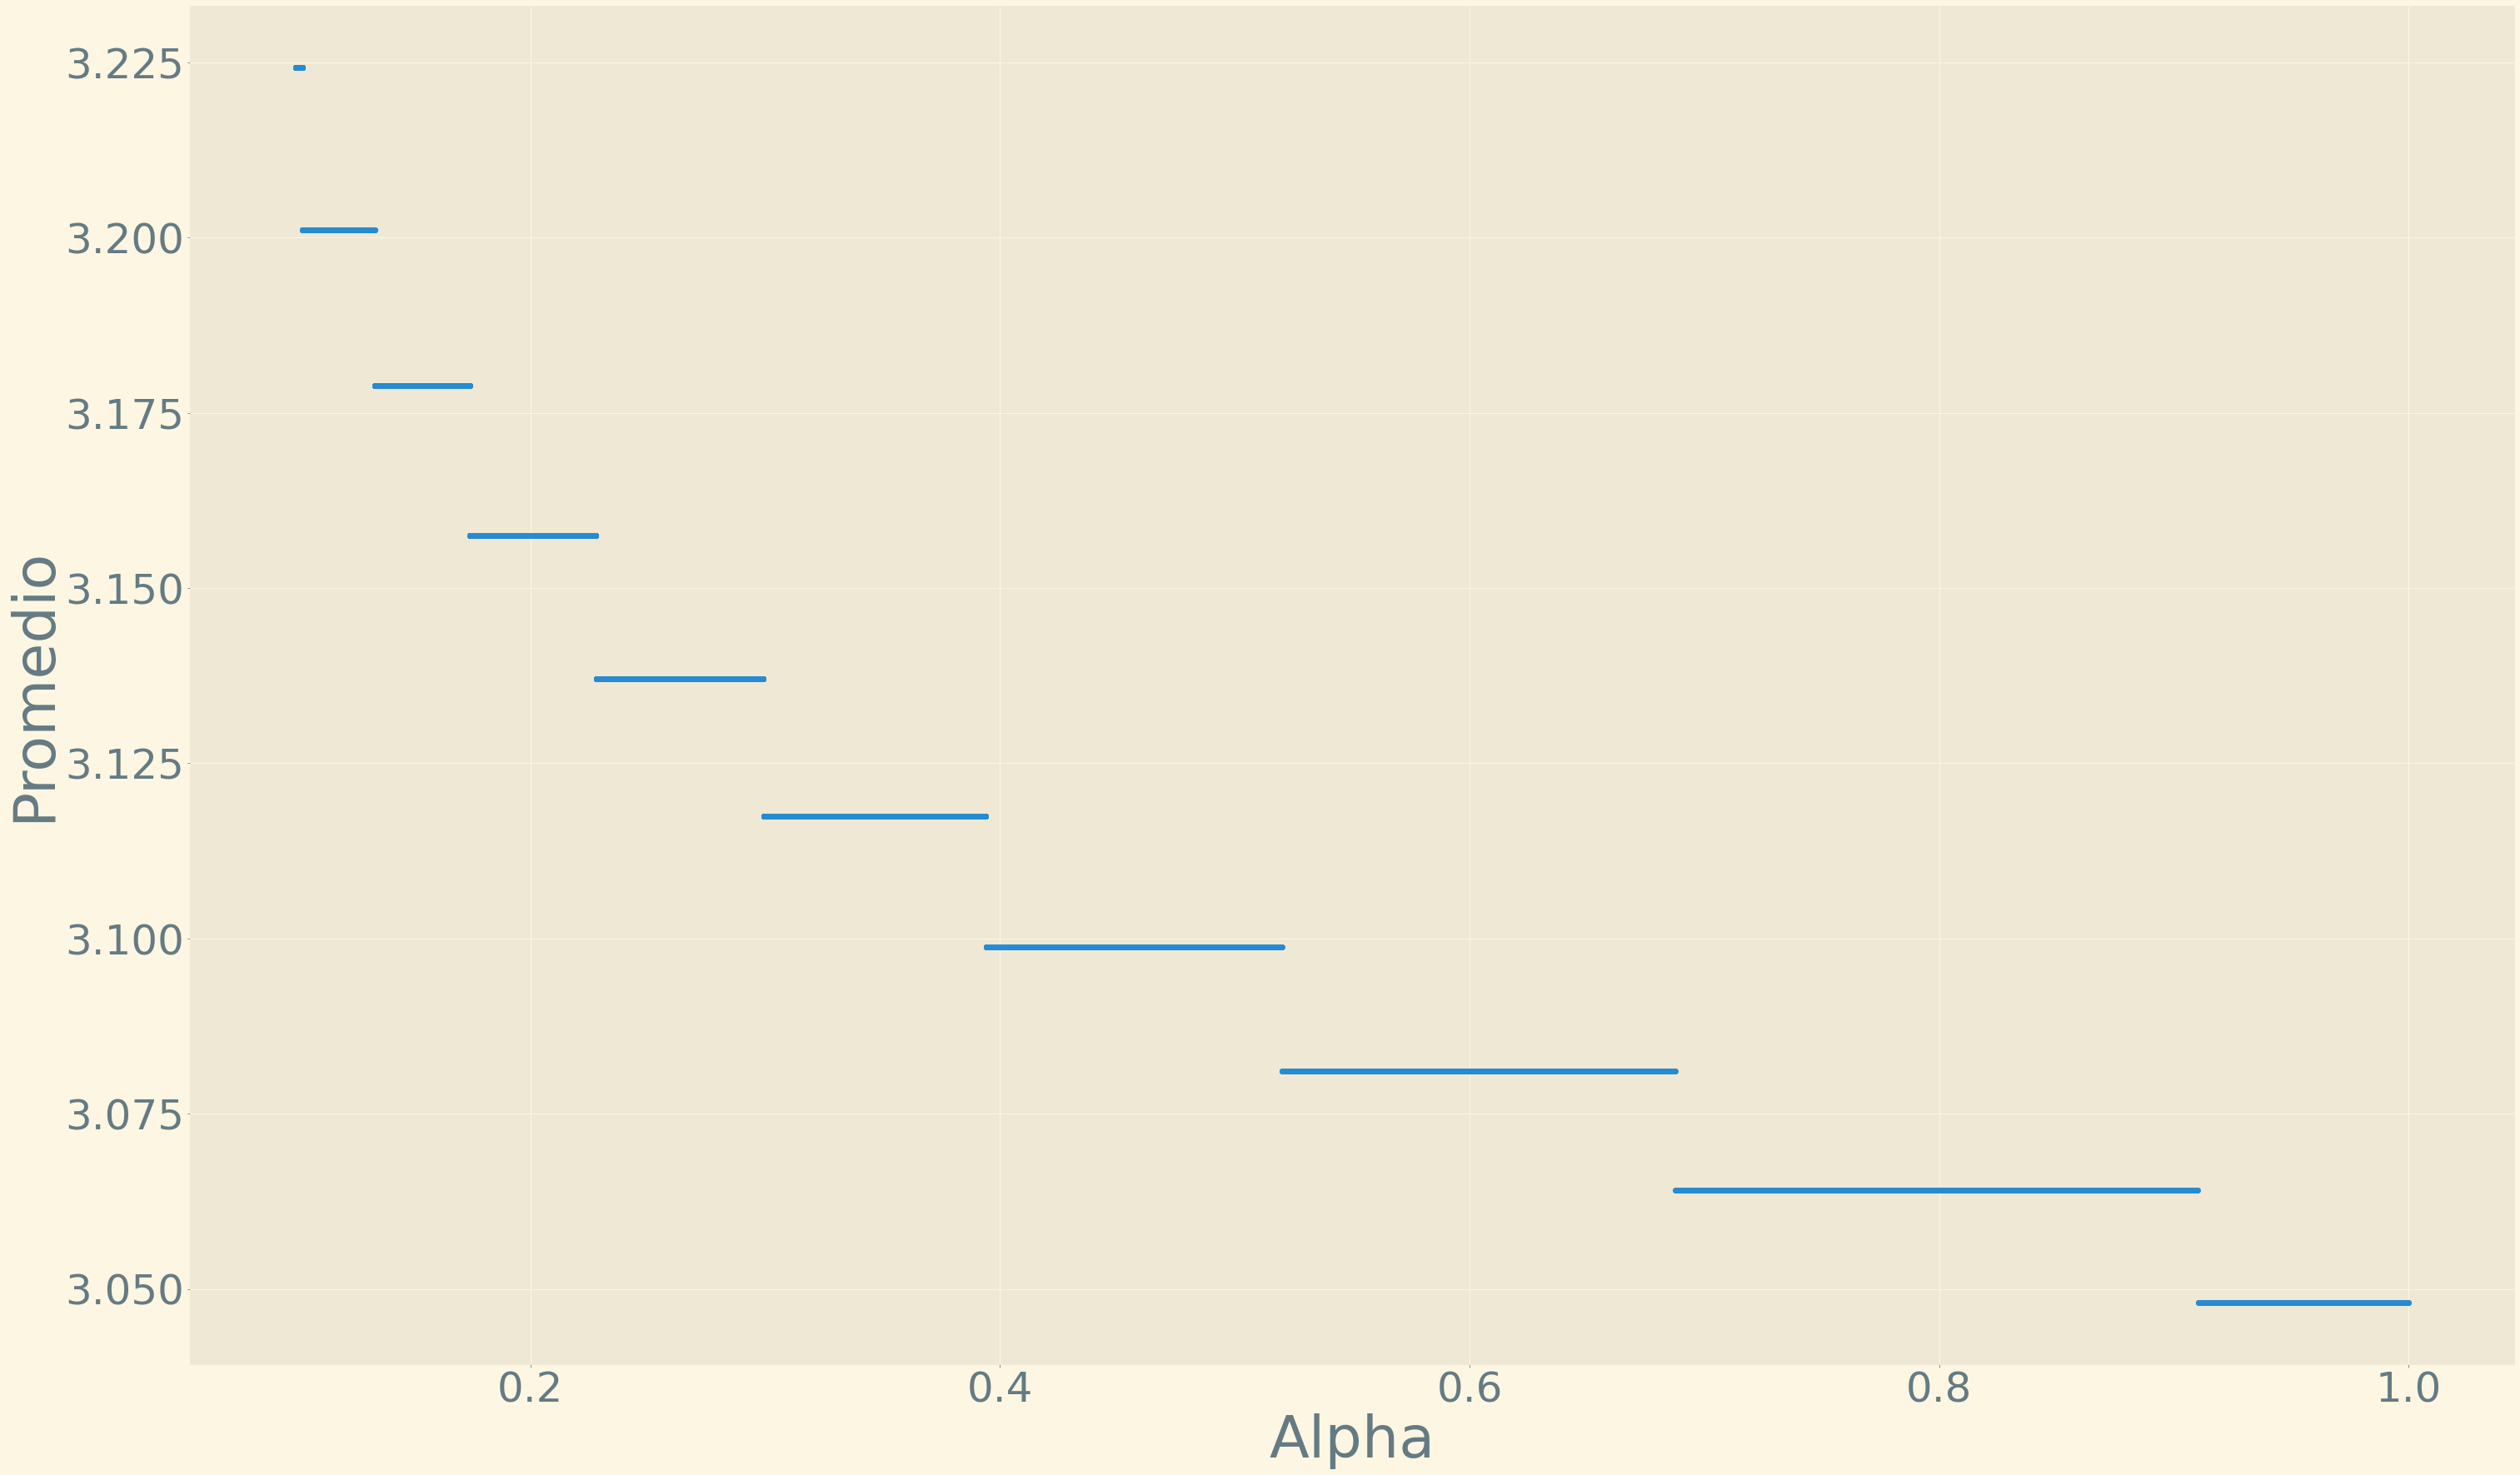

In [33]:

fig = plt.figure(figsize = (50, 30))
plt.scatter(alphas, std_historico)
plt.xlabel("Alpha", fontsize = 70)
plt.xticks(fontsize = 50);
plt.ylabel("Desviación estandar", fontsize = 70)
plt.yticks(fontsize = 50);